# Traitement de données TD4

Le code pour ce TD est à rendre sur Arche avant le **vendredi 10 novembre 2023** pour les non-alternant·e·s et avant le **vendredi 24 novembre 2023** pour les alternant·e·s. Il sera à rendre sous la forme d'un notebook (.ipynb). Si vous utilisez Google colab, télécharger le fichier .ipynb pour le déposer sur Arche.

Les critères d'évaluation incluent la qualité du traitement des données, l'utilisation judicieuse des functions de pandas (et d'autres librairies python si utiles) et la clarté des résultats de l'analyse (c.à.d est-ce que la préparation de vos données vous permet de justifier vos conclusions ?)

# Données

Le fichier à l'adresse https://mdaquin.github.io/d/tdd/colony.csv contient des données sur les colonies de d'abeilles aux états unis, et les pertes de colonies dans les différents états au cours des années 2025 à 2021. Il a été obtenu du [site du derpartement d'agriculture du gouvernement américain](https://usda.library.cornell.edu/concern/publications/rn301137d?locale=en) (USDA). Il contient les colonnes suivante

 - year :	l'année
 - months	: la période de l'année concernée
 - state : l'état des états unis (ou "Other States") concerné
 - colony_n : nombre de colonies
 - colony_max : nombre maximum de colonies dans la période
 - colony_lost : nombre de colonies perdues
 - colony_lost_pct : pourcentage des colonies perdues
 - colony_added : nombre de colonies ajoutées
 - colony_reno : nombre de colonies rénovées
 - colony_reno_pct :	pourcentage des colonies rénovées

Un autre fichier est aussi disponible à https://mdaquin.github.io/d/tdd/stressor.csv donnant l'exposition à des éléments pouvant conduire à la perte de colonies dans chaque état à chaque période. Ce jeu de données inclut :

 - year :	l'année
 - months	: la période de l'année concernée
 - state : l'état des états unis (ou "Other States") concerné
 - stressor	: le type de problème
 - stress_pct : le pourcentage de colonies ayant été affectées par le problème.

L'objectif du TD est de comprendre quels facteurs (géographiques, économiques, etc.) influent sur ces les colonies d'abeilles.

# Tâches

Votre objectif ici est donc d'analyser ces données en relation avec d'autres données que vous trouverez en ligne afin :
1. trouver quels sont les problèmes ayant le plus d'influence sur la perte de colonies d'abeilles.
2. d'expliquer les différences en nombre de colonies entre états.
3. expliquer les différences de pertes de colonies d'une année à l'autre, globalement et état par état.

Pour cela, il vous faudra trouver des données supplémentaires, en particulier sur les états. Vous pouvez par exemple en trouver sur le site du [recensement américain](https://www.census.gov/data.html) ou  sur le site du [service national de météorologie américain](https://www.weather.gov/phi/localclimate.html).

# Format du rendu

Le rendu est demandé sous la forme d'un notebook de façon à ce qu'il puisse jouer le role à la fois de code et de rapport pour votre analyse. Il est important donc d'ajouter des cellules de texte pour, au fur et à mesure du code et des tâches, expliquer votre démarche, vos résultats et vos conclusions.

N'hésitez pas aussi à ajouter des commentaires dans le code pour le rendre plus lisible.

In [351]:
# commencez ici
import pandas as pd

perturbation_factor = pd.read_csv('https://mdaquin.github.io/d/tdd/stressor.csv')
perturbation_factor

,year,months,state,stressor,stress_pct
0,2015,January-March,Alabama,Varroa mites,10.0
1,2015,January-March,Alabama,Other pests/parasites,5.4
2,2015,January-March,Alabama,Disesases,NaN
3,2015,January-March,Alabama,Pesticides,2.2
4,2015,January-March,Alabama,Other,9.1
...,...,...,...,...,...
7327,2021,April-June,United States,Other pests/parasites,12.8
7328,2021,April-June,United States,Disesases,5.5
7329,2021,April-June,United States,Pesticides,12.3
7330,2021,April-June,United States,Other,11.3


Ici, je voudrais de savoir le type de donner pour chaque colonne

In [352]:
perturbation_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7332 non-null   int64  
 1   months      7332 non-null   object 
 2   state       7332 non-null   object 
 3   stressor    7332 non-null   object 
 4   stress_pct  6489 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 286.5+ KB


Il me semble que la stress_pct ont des valeurs manques

<AxesSubplot:>

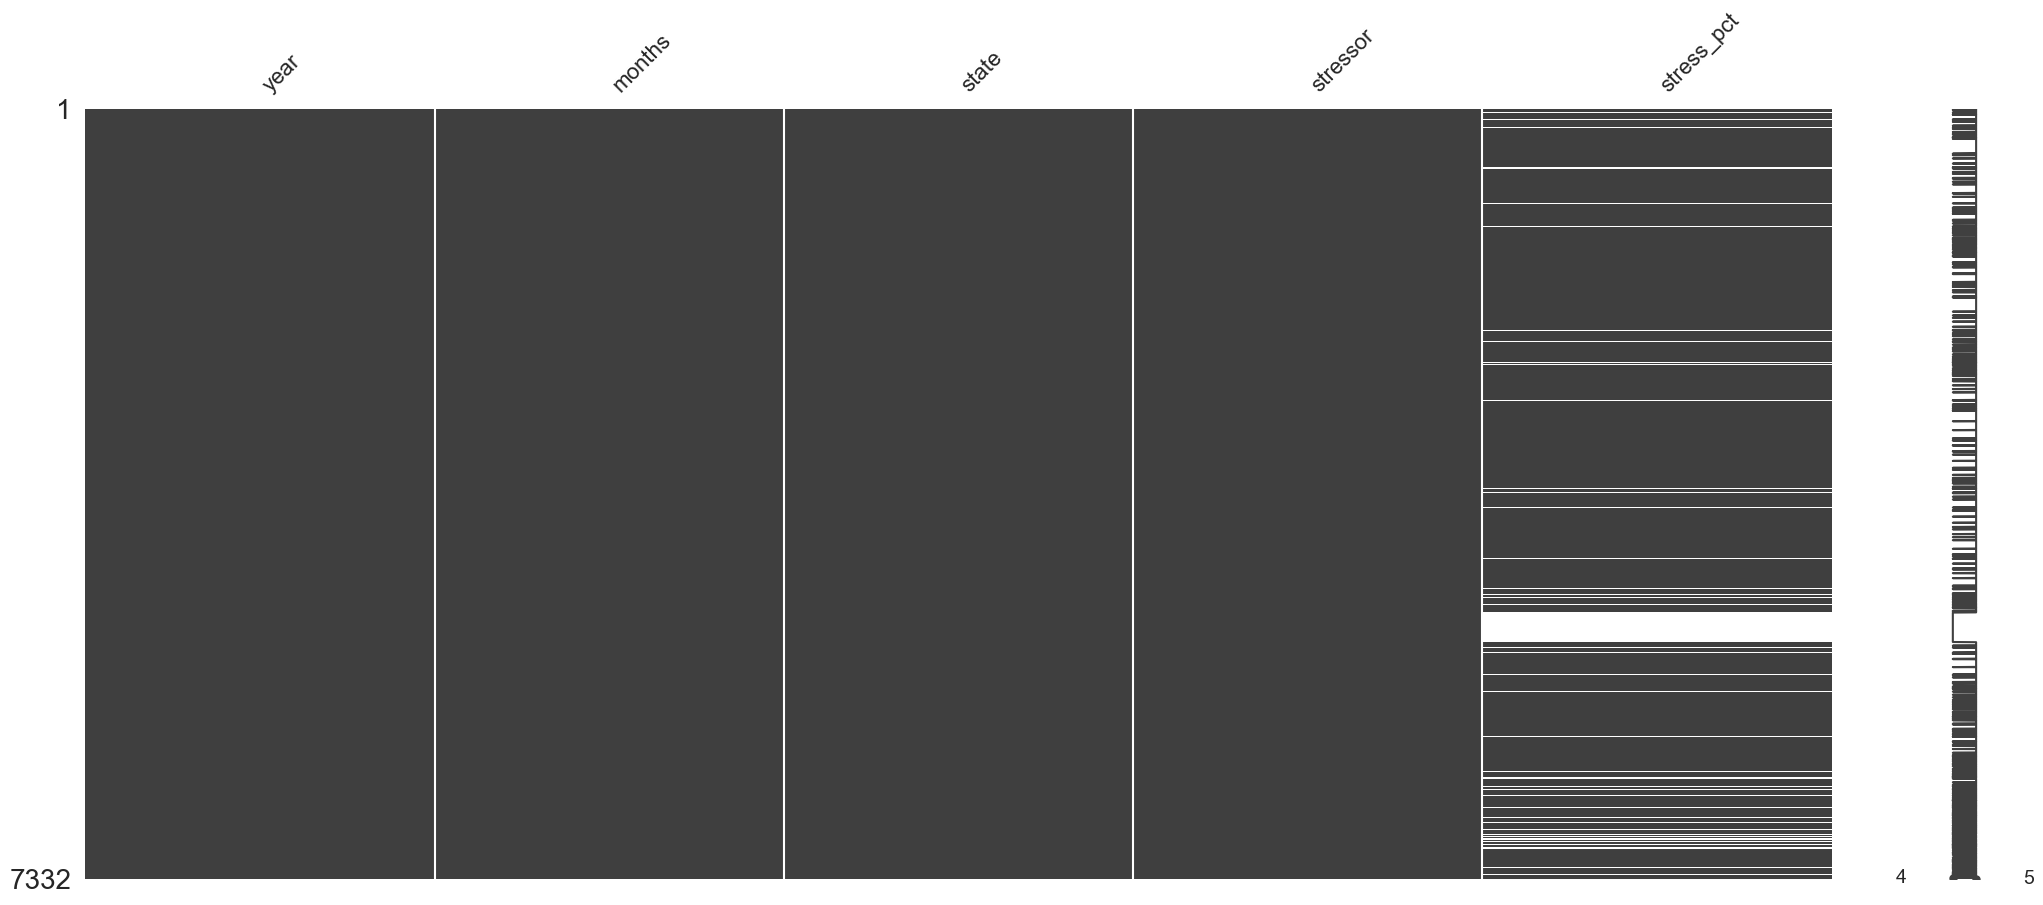

In [353]:
import missingno as mno
mno.matrix(perturbation_factor)

Voici la list des valeurs manques, donc 11% des valeurs sont inconnues :

In [354]:
rows_with_missing_values = perturbation_factor[perturbation_factor.stress_pct.isna()]
rows_with_missing_values

,year,months,state,stressor,stress_pct
2,2015,January-March,Alabama,Disesases,NaN
9,2015,January-March,Arizona,Pesticides,NaN
32,2015,January-March,Connecticut,Disesases,NaN
33,2015,January-March,Connecticut,Pesticides,NaN
51,2015,January-March,Hawaii,Pesticides,NaN
...,...,...,...,...,...
7301,2021,April-June,Washington,Unknown,NaN
7305,2021,April-June,West Virginia,Pesticides,NaN
7316,2021,April-June,Wyoming,Disesases,NaN
7321,2021,April-June,Other States,Other pests/parasites,NaN


In [355]:
perturbation_factor.stress_pct.isna().sum()/len(perturbation_factor)

0.11497545008183306

Maintenance, je voudrais de savoir s'il y a des indices pour les récupérer, je vais essayer de savoir s'il est possible récupérer
Et si possible, dans quel sens et quelle sont les conséquences sur la résulta

Je prendre un exemple de l'etat de Arkansas:

In [356]:
fl = perturbation_factor[(perturbation_factor['state'] == "Arkansas")]
fl

,year,months,state,stressor,stress_pct
12,2015,January-March,Arkansas,Varroa mites,17.6
13,2015,January-March,Arkansas,Other pests/parasites,11.4
14,2015,January-March,Arkansas,Disesases,1.5
15,2015,January-March,Arkansas,Pesticides,3.4
16,2015,January-March,Arkansas,Other,1.0
...,...,...,...,...,...
7063,2021,April-June,Arkansas,Other pests/parasites,23.0
7064,2021,April-June,Arkansas,Disesases,5.9
7065,2021,April-June,Arkansas,Pesticides,2.9
7066,2021,April-June,Arkansas,Other,2.1


J'ai choisi Varroa mites et Pesticides pour examiner :

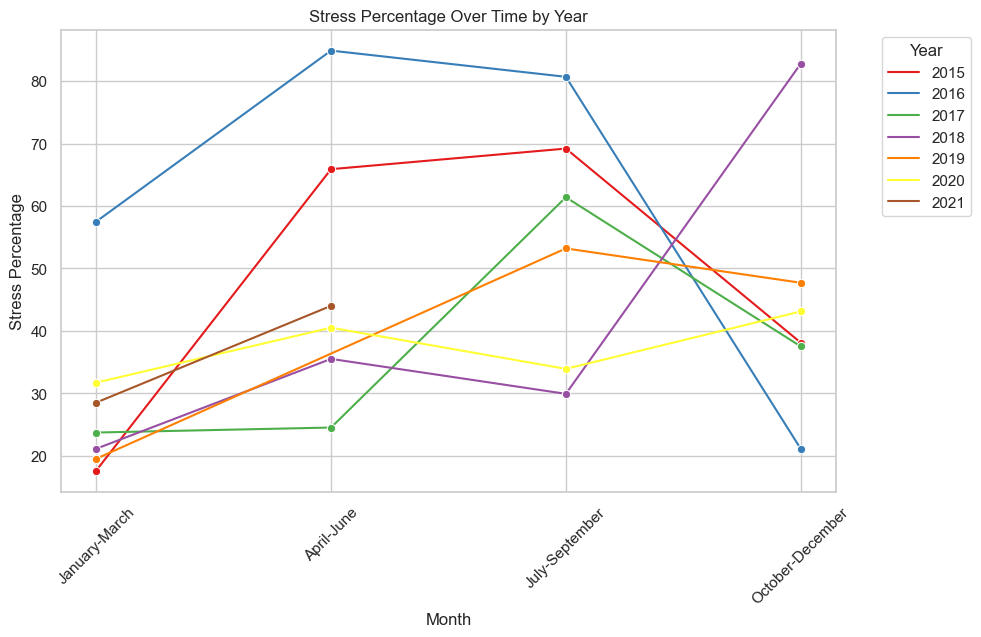

In [357]:
import seaborn as sns
from matplotlib import pyplot as plt

fl_1 = fl[fl.stressor == "Varroa mites"]

# Create a line plot for the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=fl_1, x='months', y='stress_pct', hue='year', marker='o', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Stress Percentage')
plt.title('Stress Percentage Over Time by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

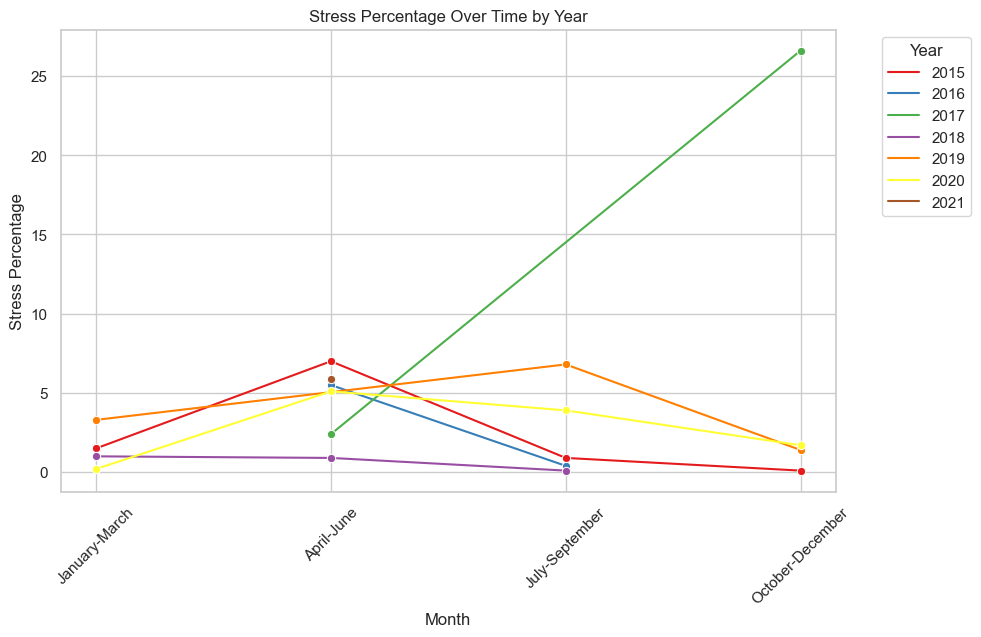

In [358]:
fl_2 = fl[fl.stressor == "Disesases"]

# Create a line plot for the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=fl_2, x='months', y='stress_pct', hue='year', marker='o', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Stress Percentage')
plt.title('Stress Percentage Over Time by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Nous pouvons voir que les valuers present dans une manière aléatoire. Il n'y a pas un tendance entre les mois, entre l'année. Donc, essayer de récupére les données en utilisant la sense de chronologique n'est pas une bonne idée.

Maintenaint, je vais examiner la somme de pourcentage par ans (entre un facteur seulement) et par mois (entre les facteurs dans un period) :

In [359]:
total = perturbation_factor[(perturbation_factor['year'] == 2015) & (perturbation_factor['state'] == "Arkansas") & (perturbation_factor['stressor'] == "Varroa mites")]['stress_pct'].sum()
total

190.79999999999998

In [360]:
total = perturbation_factor[(perturbation_factor['year'] == 2015) & (perturbation_factor['state'] == "Arkansas") & (perturbation_factor['months'] == "April-June")]['stress_pct'].sum()
total

195.60000000000002

Les valeurs totals dans les deux cas dépasser 100%, donc les pourcentages est fait pas au niveau de chaque année. Pour un period, il est possible d'avoir multiples facteurs de perturbations. Pour les valeurs manquantes, je décide de ne pas les re-constrituer à partir des données existants.

In [ ]:
abey_colonie = pd.read_csv('https://mdaquin.github.io/d/tdd/colony.csv')

In [ ]:
abey_colonie

Voici la composition des valeurs manquante pour la deuxième data set:

In [ ]:
import missingno as mno
mno.matrix(abey_colonie)

Pour les mois d'avril-juin de 2019, il n'y a aucun enregistrement. Donc, je vais le supprimer parcequ'il n'y a aucun moyen de le re-contrituer.

In [ ]:
rows_with_missing_values = abey_colonie[abey_colonie.colony_n.isna()]
rows_with_missing_values

In [ ]:
abey_colonie = abey_colonie[~((abey_colonie['year'] == 2019) & (abey_colonie['months'] == "April-June"))]

En regardant sur la description des données, les colones colong_max, colony_added et colony_lost_pct peut récuperer à partir des valeurs exisitants.

In [ ]:
abey_colonie['colony_max'].fillna(abey_colonie['colony_n'] + abey_colonie['colony_added'], inplace=True)

In [ ]:
abey_colonie['colony_added'].fillna(abey_colonie['colony_max'] - abey_colonie['colony_n'], inplace=True)

In [ ]:
abey_colonie['colony_lost_pct'].fillna((abey_colonie['colony_lost']/abey_colonie['colony_max'])*100, inplace=True)

Pour la colone de colony_reno et colony_reno_pct, il faut qu'une de deux colone avoir une valeur pour recuperer le valeur manquant. Si non vais vais le laisser parceque je ne regard pas sur ces colones.

In [ ]:
abey_colonie['colony_reno'] = abey_colonie.apply(lambda row: (row['colony_reno_pct'] / 100) * row['colony_max'] if pd.isna(row['colony_reno']) and not pd.isna(row['colony_reno_pct']) else row['colony_reno'], axis=1)

In [ ]:
abey_colonie['colony_reno_pct'] = abey_colonie.apply(lambda row: (row['colony_reno'] / row['colony_max']) * 100 if pd.isna(row['colony_reno_pct']) and not pd.isna(row['colony_reno']) else row['colony_reno_pct'], axis=1)

In [ ]:
mno.matrix(abey_colonie)

In [ ]:
rows_with_missing_values = abey_colonie[(abey_colonie.colony_reno.isna())]
rows_with_missing_values

In [ ]:
# abey_colonie['colony_reno'].fillna(0, inplace=True)

Pour le pourcentage des colonies perdu, je vais mis à 0 pour les valeurs manquants car il n'y a accun information et régles pour l'intepolation. Je comprendre que il peut-être de-avantage l'important des données pour certain état mais je peux pas trouver une meilleur solution.

In [ ]:
perturbation_factor = perturbation_factor[~((perturbation_factor['year'] == 2019) & (perturbation_factor['months'] == "April-June"))]

In [ ]:
perturbation_factor['stress_pct'].fillna(0,inplace=True)

Je vais pivoter les factoeurs de perturbation ver colone pour la calculation

In [ ]:
# Pivot the DataFrame to create separate columns for each stressor
perturbation_factor = perturbation_factor.pivot(index=['year', 'months', 'state'], columns='stressor')['stress_pct'].reset_index()

# Reset the column names
perturbation_factor.columns.name = None

Je vais calculer les moyen de chauqe facteur et je peur voir la Varroa mites avoir le plus nfluance sur la perdre de colonie.

In [ ]:
# Calculate the mean colony loss for each factor
mean_varroa_mites_loss = perturbation_factor['Varroa mites'].mean()
mean_other_pests_loss = perturbation_factor['Other pests/parasites'].mean()
mean_diseases_loss = perturbation_factor['Disesases'].mean()
mean_pesticides_loss = perturbation_factor['Pesticides'].mean()
mean_other_loss = perturbation_factor['Other'].mean()
mean_unknown_loss = perturbation_factor['Unknown'].mean()

# Create a DataFrame to store mean colony loss for each factor
mean_loss = pd.DataFrame()

# Calculate the mean colony loss for each problem or stressor factor
mean_loss['Factor'] = ['Varroa mites', 'Other pests/parasites', 'Diseases', 'Pesticides', 'Other', 'Unknown']
mean_loss['Mean Colony Loss'] = [mean_varroa_mites_loss, mean_other_pests_loss, mean_diseases_loss, mean_pesticides_loss, mean_other_loss, mean_unknown_loss]

# Print the mean colony loss for each factor
print("Mean Colony Loss for Varroa Mites:", mean_varroa_mites_loss)
print("Mean Colony Loss for Other Pests/Parasites:", mean_other_pests_loss)
print("Mean Colony Loss for Diseases:", mean_diseases_loss)
print("Mean Colony Loss for Pesticides:", mean_pesticides_loss)
print("Mean Colony Loss for Other:", mean_other_loss)
print("Mean Colony Loss for Unknown:", mean_unknown_loss)

In [ ]:
# Create a bar plot to visualize the mean colony loss for each factor
plt.figure(figsize=(10, 6))
plt.bar(mean_loss['Factor'], mean_loss['Mean Colony Loss'], color='skyblue')
plt.xlabel('Problem or Stressor Factor')
plt.ylabel('Mean Colony Loss')
plt.title('Mean Colony Loss by Problem or Stressor Factor')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Je vais explorer la distribution des valeurs et trouver que marglé des autres avoir moin influance, il y a certain valeurs (>20%) interesser.

In [ ]:
# Create data distributions and box plots for each factor
factors = ['Varroa mites', 'Other pests/parasites', 'Disesases', 'Pesticides', 'Other', 'Unknown']

for factor in factors:
    plt.figure(figsize=(10, 6))
    subset = factor

    # Data Distribution (Histogram)
    plt.subplot(1, 2, 1)
    plt.hist(perturbation_factor[subset], bins=20, color='blue', alpha=0.7)
    plt.xlabel('Colony Lost')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Colony Loss for {factor}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=perturbation_factor[subset], color='red')
    plt.title(f'Box Plot of Colony Loss for {factor}')

    plt.show()

    plt.show()

Je re-grrouper les donnés par année :

In [ ]:
# Group by 'state,' 'year,'
abey_colonie_filter_by_year = abey_colonie.groupby(['state', 'year']).agg({
    'colony_n': 'mean',
    'colony_max': 'max',  # Take the maximum value of a year
    'colony_lost': 'sum',
    'colony_lost_pct': 'mean',
    'colony_added': 'sum'
}).reset_index()
abey_colonie_filter_by_year_no_us = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] != 'United States']

# Create an empty DataFrame to store the results
top10_lost_by_year = pd.DataFrame()
top10_max_by_year = pd.DataFrame()
reorder = pd.DataFrame()

for year in abey_colonie_filter_by_year['year'].unique():
    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5 = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year].sort_values(by='colony_lost_pct', ascending=False).head(10)

    top = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year].sort_values(by='colony_lost_pct', ascending=False)

    reorder.append(top)

    # Create a new column with the year as the column name and populate it with state values
    top10_lost_by_year[str(year)] = top5['state'].tolist()

    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5_max = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year].sort_values(by='colony_max', ascending=False).head(11)

    # Create a new column with the year as the column name and populate it with state values
    top10_max_by_year[str(year)] = top5_max['state'].tolist()

top10_max_by_year = top10_max_by_year.drop(0)
top10_lost_by_year

Je vais faire un pie chart pour savoir la propotion des colony_max et colony_lost. Le résulta est ceux qui avoir plus des abey perdre plus des abey (à comparer au total 'United States')

In [ ]:
for year in abey_colonie_filter_by_year['year'].unique():
    # Calculate the national total for the specific year
    national_total_max = abey_colonie_filter_by_year[(abey_colonie_filter_by_year['year'] == year) & (abey_colonie_filter_by_year['state'] == 'United States')]['colony_max'].values[0]
    national_total_lost = abey_colonie_filter_by_year[(abey_colonie_filter_by_year['year'] == year) & (abey_colonie_filter_by_year['state'] == 'United States')]['colony_lost'].values[0]

    # Filter the DataFrame for the specific year
    year_mask = abey_colonie_filter_by_year['year'] == year

    # Filter out 'United States' from the DataFrame for the pie chart
    data_max = abey_colonie_filter_by_year.loc[year_mask & (abey_colonie_filter_by_year['state'] != 'United States')]
    data_lost = abey_colonie_filter_by_year.loc[year_mask & (abey_colonie_filter_by_year['state'] != 'United States')]

    # Calculate the proportions of colony_max and colony_lost for each state compared to the national totals
    data_max['proportion'] = data_max['colony_max'] / national_total_max
    data_lost['proportion'] = data_lost['colony_lost'] / national_total_lost

    # Filter out slices with small proportions (e.g., less than 1%)
    min_proportion = 0.01
    data_max = data_max[data_max['proportion'] >= min_proportion]
    data_lost = data_lost[data_lost['proportion'] >= min_proportion]

    # Create subplots with two pie charts side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Create the first pie chart for colony_max
    ax1 = axes[0]
    labels_max = data_max['state']
    proportions_max = data_max['proportion']
    ax1.pie(proportions_max, labels=labels_max, autopct='%1.1f%%', startangle=140, labeldistance=1.05)
    ax1.set_title(f'Colony Max Proportion by State ({year})')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Create the second pie chart for colony_lost
    ax2 = axes[1]
    labels_lost = data_lost['state']
    proportions_lost = data_lost['proportion']
    ax2.pie(proportions_lost, labels=labels_lost, autopct='%1.1f%%', startangle=140, labeldistance=1.05)
    ax2.set_title(f'Colony Lost Proportion by State ({year})')
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie charts
    plt.tight_layout()
    plt.show()


Je re-grouper les donnés par mois et souligne 5 états perdent le plus colonie par mois:

In [ ]:
# Group by 'state,' 'months,'
abey_colonie_filter_by_month = abey_colonie.groupby(['state', 'months']).agg({
    'colony_max': 'mean',  # Take the minimum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
    'colony_added': 'mean'
}).reset_index()

abey_colonie_filter_by_month['colony_lost_pct'] = (abey_colonie_filter_by_month['colony_lost']/abey_colonie_filter_by_month['colony_max'])*100

abey_colonie_filter_by_month_no_us = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] != 'United States']

# abey_colonie_filter_by_month['colony_lost_pct'] = (abey_colonie_filter_by_month['colony_lost']/abey_colonie_filter_by_month['colony_max'])*100

# Create an empty DataFrame to store the results
top10_by_month = pd.DataFrame()

for month in abey_colonie_filter_by_month['months'].unique():
    # Filter the DataFrame for the current year, sort it, and take the top 5 rows
    top5_month = abey_colonie_filter_by_month_no_us[abey_colonie_filter_by_month_no_us['months'] == month].sort_values(by='colony_lost_pct', ascending=False).head(5)

    # Create a new column with the year as the column name and populate it with state values
    top10_by_month[str(month)] = top5_month['state'].tolist()

# top5_by_month = top5_by_month.drop(top5_by_month.index[0]).reset_index(drop=True)
top10_by_month = top10_by_month[['January-March', 'April-June', 'July-September', 'October-December']]
top10_by_month

Pour les colonies perdues, je vais utiliser le pourcentage car il ne va affecter par le grand nombre de colonies de Californie :

In [ ]:
# Set seaborn style for better aesthetics (optional)
sns.set(style="whitegrid")

# Get unique years
unique_years = abey_colonie_filter_by_year_no_us['year'].unique()

# Set the figure size for a bigger plot
plt.figure(figsize=(14, 10))

# Plot each line separately
for year in unique_years:
    # Subset DataFrame for the current year
    subset_df = abey_colonie_filter_by_year_no_us[abey_colonie_filter_by_year_no_us['year'] == year]

    # Calculate the average for the current year
    average_colony_lost_pct = subset_df['colony_lost_pct'].mean()

    # Plot the line for the current year
    for index, row in subset_df.iterrows():
        # Mark points above and below the average with different colors
        if row['colony_lost_pct'] > average_colony_lost_pct:
            plt.scatter(year, row['colony_lost_pct'], color='red', label=None)
        else:
            plt.scatter(year, row['colony_lost_pct'], color='blue', label=None)

    # Identify the top 3 states losing the most and least for the current year
    top_states_most_loss = subset_df.nlargest(3, 'colony_lost_pct', 'all')['state']
    top_states_least_loss = subset_df.nsmallest(3, 'colony_lost_pct', 'all')['state']

    # Label the top 3 states losing the most
    for state in top_states_most_loss:
        state_row = subset_df[subset_df['state'] == state].iloc[0]
        plt.text(year, state_row['colony_lost_pct'], f'{state}', ha='left', va='bottom', color='red', rotation=45)

    # Label the top 3 states losing the least
    for state in top_states_least_loss:
        state_row = subset_df[subset_df['state'] == state].iloc[0]
        plt.text(year, state_row['colony_lost_pct'], f'{state}', ha='left', va='top', color='blue', rotation=45)

# Plot the average line
average_line = abey_colonie_filter_by_year_no_us.groupby('year')['colony_lost_pct'].mean()
plt.plot(average_line.index, average_line.values, linestyle='--', color='green', label='Average', marker='o')

# Increase the scale distance of the y-axis by setting custom ticks
plt.yticks(range(0, 30, 5))

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Colony Lost Percentage')
plt.title('Colony Lost Percentage Over Time')

# Add legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Show the plot
plt.show()


En général, les états vont avoir plus colonie en printemps (Avril-Juin):

In [ ]:
import matplotlib.pyplot as plt

# Create a list of states including 'United States'
states = abey_colonie_filter_by_month['state'].unique()

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month['months'] = pd.Categorical(abey_colonie_filter_by_month['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month = abey_colonie_filter_by_month.sort_values(['months'])

# Filter out 'United States' data for the total line
us_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == 'United States']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for state in states:
    if state == 'United States':
        # Plot 'United States' as a separate line
        ax.plot(us_data['months'], us_data['colony_max'], label=state, linestyle='--', linewidth=2, marker='o', markersize=6)
    else:
        # Filter data for the current state
        state_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == state]
        ax.plot(state_data['months'], state_data['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by State and United States')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
# Create a list of states including 'United States'
states = abey_colonie_filter_by_month['state'].unique()

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month['months'] = pd.Categorical(abey_colonie_filter_by_month['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month = abey_colonie_filter_by_month.sort_values(['months'])

# Filter out 'United States' data for the total line
us_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == 'United States']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for state in states:
    if state == 'United States':
        # Plot 'United States' as a separate line
        ax.plot(us_data['months'], us_data['colony_lost'], label=state, linestyle='--', linewidth=2, marker='o', markersize=6)
    else:
        # Filter data for the current state
        state_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == state]
        ax.plot(state_data['months'], state_data['colony_lost'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost')
ax.set_title('Colony Lost by State and United States')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

Sauf ces états:

In [ ]:
import pandas as pd

# Pivot the DataFrame to create separate columns for each month's colony_max
pivoted_df = abey_colonie_filter_by_month.pivot(index='state', columns='months', values='colony_max').reset_index()

# Rename the columns for clarity
pivoted_df.columns = ['state', 'January-March', 'April-June', 'July-September', 'October-December']

# Calculate and add a new column for states where 'April-June' colony_max is smaller than 'January-March'
pivoted_df['April-June < January-March'] = (pivoted_df['April-June'] < pivoted_df['January-March'])

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month['months'] = pd.Categorical(abey_colonie_filter_by_month['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month = abey_colonie_filter_by_month.sort_values(['months'])

#Filtering states
pivoted_df = pivoted_df[pivoted_df['April-June < January-March'] == True]
states = pivoted_df['state'].unique()

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for state in states:
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month[abey_colonie_filter_by_month['state'] == state]
    ax.plot(state_data['months'], state_data['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by State')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
# Pivot the DataFrame to create separate columns for each month's colony_max
pivoted_df = abey_colonie.drop(['colony_n','colony_lost','colony_lost_pct','colony_added','colony_reno','colony_reno_pct'], axis=1)
pivoted_df = pivoted_df.pivot(index=['state', 'year'], columns='months', values='colony_max').reset_index()
pivoted_df[pivoted_df['year'] == 2019]

Le nombre de colonie est stable entre 2015-2021:

In [ ]:
# Filter out the 'United States' data
us_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] == 'United States']

# Group other states by year
state_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] != 'United States']

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the 'United States' data
ax.plot(us_data['year'], us_data['colony_max'], label='United States', marker='o', markersize=6)

# Loop through other states and plot them separately
for state in state_data.state.unique():
    state_subset = state_data[state_data['state'] == state]
    ax.plot(state_subset['year'], state_subset['colony_max'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max Over the Years')

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.show()

Mais le perd est décliné de chaque année (entre 2015-2020) marglé les varier :

In [ ]:
# Filter out the 'United States' data
us_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] == 'United States']

# Group other states by year
state_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['state'] != 'United States']

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the 'United States' data
ax.plot(us_data['year'], us_data['colony_lost'], label='United States', marker='o', markersize=6)

# Loop through other states and plot them separately
for state in state_data.state.unique():
    state_subset = state_data[state_data['state'] == state]
    ax.plot(state_subset['year'], state_subset['colony_lost'], label=state, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Colony Lost')
ax.set_title('Colony Lost Over the Years')

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.show()

Je évalue aussi les causes de perd de colonies, et la Varroa mites prends la tête avec un large margin (par ans et par mois).

In [ ]:
# Merge the two DataFrames based on 'state', 'year', and 'months'
perturbation_factor = perturbation_factor.merge(abey_colonie[['state', 'year', 'months', 'colony_lost','colony_max']], on=['state', 'year', 'months'])
perturbation_factor

In [ ]:
new_column_names = {
    'year': 'year',
    'months': 'months',
    'state': 'state',
    'colony_lost': 'colony_lost',
    'Disesases': 'Disesases pct',
    'Other': 'Other pct',
    'Other pests/parasites': 'Other pests/parasites pct',
    'Pesticides': 'Pesticides pct',
    'Unknown': 'Unknown pct',
    'Varroa mites': 'Varroa mites pct'
}

perturbation_factor = perturbation_factor.rename(columns=new_column_names)
perturbation_factor['Disesases'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Disesases pct']
perturbation_factor['Other'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Other pct']
perturbation_factor['Other pests/parasites'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Other pests/parasites pct']
perturbation_factor['Pesticides'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Pesticides pct']
perturbation_factor['Unknown'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Unknown pct']
perturbation_factor['Varroa mites'] = (perturbation_factor['colony_lost'] /100)*perturbation_factor['Varroa mites pct']


Des fois, les valeurs est plus haut que normal pour les causes de la perturbation :

In [ ]:
Disesases_spe = perturbation_factor[perturbation_factor['Disesases pct'] > 20]
Other_pet_parasites_spe = perturbation_factor[perturbation_factor['Other pests/parasites pct'] > 20]
Pesticides_spe = perturbation_factor[perturbation_factor['Pesticides pct'] > 20]

In [ ]:
# Group by 'state,' 'year,'
perturbation_factor_by_year = perturbation_factor.groupby(['state', 'year']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'sum',
    'Disesases':'sum',
    'Other':'sum',
    'Other pests/parasites':'sum',
    'Pesticides':'sum',
    'Unknown':'sum',
    'Varroa mites':'sum',
}).reset_index()

In [ ]:
perturbation_factor_by_year_us = perturbation_factor_by_year[perturbation_factor_by_year['state'] == 'United States']
factors = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

from itertools import cycle
# Choose a colormap (e.g., 'tab10' for a set of 10 distinct colors)
colormap = plt.cm.get_cmap('tab10')

# Create a line graph for each factor with automatic color assignment
color_cycle = cycle(colormap.colors)

#Create dataframe to store data
data = {}

# Add a 'year' column to the DataFrame
data['year'] = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for factor in factors:
    data[factor] = perturbation_factor_by_year_us[factor]
    color = next(color_cycle)
    plt.plot(data['year'], data[factor], label=factor, marker='o', linestyle='-', color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph for Factors')
plt.legend()

# Show the graph
plt.show()

In [ ]:
perturbation_factor_by_year_us = perturbation_factor_by_year[perturbation_factor_by_year['state'] == 'United States']
factors = ['Disesases', 'Other', 'Other pests/parasites', 'Pesticides', 'Unknown', 'Varroa mites']

from itertools import cycle
# Choose a colormap (e.g., 'tab10' for a set of 10 distinct colors)
colormap = plt.cm.get_cmap('tab10')

# Create a line graph for each factor with automatic color assignment
color_cycle = cycle(colormap.colors)

#Create dataframe to store data
data = {}

# Add a 'year' column to the DataFrame
data['year'] = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for factor in factors:
    data[factor] = perturbation_factor_by_year_us[factor]
    color = next(color_cycle)
    plt.plot(data['year'], data[factor], label=factor, marker='o', linestyle='-', color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph for Factors')
plt.legend()

# Show the graph
plt.show()

In [ ]:
perturbation_factor_by_year_no_us = perturbation_factor_by_year[perturbation_factor_by_year['state'] != 'United States']
df = pd.DataFrame(perturbation_factor_by_year_no_us)

# List of columns to create box plots for
columns_to_plot = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

# Reshape the DataFrame to "long" format
df_long = pd.melt(df, id_vars=['year'], value_vars=columns_to_plot, var_name='Factor', value_name='Value')

# Set the figure size for the combined box plots
plt.figure(figsize=(14, 10))

# Create a box plot for all data
sns.boxplot(data=df_long, x='year', y='Value', hue='Factor', showfliers=False)

plt.title('Box Plots for Selected Columns by Year')
plt.ylabel('Percentage')

# Show the combined box plots
plt.show()

In [ ]:
# Group by 'state,' 'month,'
perturbation_factor_by_month = perturbation_factor.groupby(['state', 'months']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'mean',
    'Disesases':'mean',
    'Other':'mean',
    'Other pests/parasites':'mean',
    'Pesticides':'mean',
    'Unknown':'mean',
    'Varroa mites':'mean',
}).reset_index()

In [ ]:
perturbation_factor_by_month_us= perturbation_factor_by_month[perturbation_factor_by_month['state'] == 'United States']
perturbation_factor_by_month_no_us= perturbation_factor_by_month[perturbation_factor_by_month['state'] != 'United States']
factors = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

from itertools import cycle
# Choose a colormap (e.g., 'tab10' for a set of 10 distinct colors)
colormap = plt.cm.get_cmap('tab10')

# Create a line graph for each factor with automatic color assignment
color_cycle = cycle(colormap.colors)

#Create dataframe to store data
data = {}

# Add a 'year' column to the DataFrame
data['months'] = ['January-March', 'April-June', 'July-September', 'October-December']
for factor in factors:
    data[factor] = perturbation_factor_by_month_us[factor]
    color = next(color_cycle)
    plt.plot(data['months'], data[factor], label=factor, marker='o', linestyle='-', color=color)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Line Graph for Factors')
plt.legend()

# Show the graph
plt.show()

In [ ]:
df = pd.DataFrame(perturbation_factor_by_month_no_us)

# List of columns to create box plots for
columns_to_plot = ['Disesases pct', 'Other pct', 'Other pests/parasites pct', 'Pesticides pct', 'Unknown pct', 'Varroa mites pct']

# Reshape the DataFrame to "long" format
df_long = pd.melt(df, id_vars=['months'], value_vars=columns_to_plot, var_name='Factor', value_name='Value')

# Specify the custom order
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Use pd.Categorical to assign the custom order to the 'months' column
df_long['months'] = pd.Categorical(df_long['months'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'months' column
df_long = df_long.sort_values(by='months')

# Set the figure size for the combined box plots
plt.figure(figsize=(12, 8))

# Create a box plot for all data
sns.boxplot(data=df_long, x='months', y='Value', hue='Factor', showfliers=False)

plt.title('Box Plots for Selected Columns by Month')
plt.ylabel('Percentage')

# Show the combined box plots
plt.show()

In [ ]:
perturbation_factor_by_year_no_us

In [ ]:
perturbation_factor_by_month_no_us

Merge with the data from the US Census Geography(https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) et la list des région et division géographie

Le but est examnier les résulta dans une zone géographie plus large pour trouver les tendances

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
# Load U.S. states shapefile (example using a built-in dataset)
gdf = gpd.read_file('us state/cb_2022_us_state_20m.shp')

#Load US region
region = pd.read_csv('us state/us census bureau regions and divisions.csv')

#Merge two dataset
gdf = gdf.merge(region, left_on=['NAME','STUSPS'], right_on=['State','State Code'])
gdf.drop(columns=['State','State Code'])

In [ ]:
region

In [ ]:
# Get unique values from the 'STATE_NAME' column in the GeoDataFrame
unique_state_names_gdf = set(gdf['NAME'].unique())

# Get unique values from the 'state' column in the merged DataFrame
unique_state_names_merged = set(perturbation_factor['state'].unique())

# Find the differences
in_gdf_not_merged = unique_state_names_gdf - unique_state_names_merged
in_merged_not_gdf = unique_state_names_merged - unique_state_names_gdf

# Display the differences
print("Unique values in 'STATE_NAME' but not in 'state':", in_gdf_not_merged)
print("Unique values in 'state' but not in 'STATE_NAME':", in_merged_not_gdf)

# Define the set of unique values in 'state' that don't match 'STATE_NAME'
unique_states_to_replace = {
    'United States Virgin Islands', 'Guam', 'Delaware', 'Nevada',
    'New Hampshire', 'District of Columbia', 'Commonwealth of the Northern Mariana Islands',
    'Alaska', 'Rhode Island', 'American Samoa', 'Puerto Rico'
}

# Replace the values in 'STATE_NAME' with 'Other States' for the unique values to include
gdf.loc[gdf['NAME'].isin(unique_states_to_replace), 'NAME'] = 'Other States'

In [ ]:
top10_max_by_year = top10_max_by_year.melt(var_name='year', value_name='state')
top10_max_by_year = top10_max_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_lost_by_year = top10_lost_by_year.melt(var_name='year', value_name='state')
top10_lost_by_year = top10_lost_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_by_month = top10_by_month.melt(var_name='months', value_name='state')
top10_by_month = top10_by_month.merge(region, left_on=['state'], right_on=['State'])

J'ai trouvé que la région Ouest, Centre-Ouest et Sud avoir plus de colonie que le Nord-Est. Pourtant, quand j'affiche les résulta par Division géographie, je peux voir les nombre de colonies et le perd de colony est de-avantage dans ces divisions EST : Mid-Atlantique, Nouvelle Anglais, Sud-Est Central et Nord-Est Central. Les Divisions Mountain, Ouest et Sud (Pacifique, Mountain, Nord-Ouest Central, Sud-Ouest Central et Sud-Atlantique ont plus colonie.

In [ ]:
# top10_max_by_year[top10_max_by_year['year'] == '2015']
top10_max_by_year

In [ ]:
top10_max_by_year.groupby('year').Division.value_counts()

In [ ]:
top10_max_by_year.groupby('year').Region.value_counts()

In [ ]:
top10_lost_by_year

In [ ]:
top10_lost_by_year.groupby('year').Division.value_counts()

In [ ]:
top10_by_month

In [ ]:
top10_by_month.groupby('months').Division.value_counts()

In [ ]:
abey_colonie_filter_by_year_no_us = abey_colonie_filter_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_year_no_us

In [ ]:
abey_colonie_filter_by_year_group_by_region = abey_colonie_filter_by_year_no_us.groupby(['Division']).agg({
    'colony_n': 'mean',
    'colony_max': 'mean',
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
}).reset_index()
abey_colonie_filter_by_year_group_by_region.sort_values(by='colony_max', ascending=False)
# abey_colonie_filter_by_year_group_by_region

In [ ]:
abey_colonie_filter_by_month_no_us = abey_colonie_filter_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_month_no_us

In [ ]:
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_no_us.groupby(['Division','months']).agg({
    'colony_max': 'mean',  # Take the maximum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
    'colony_added': 'mean'
}).reset_index()
# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month_group_by_region['months'] = pd.Categorical(abey_colonie_filter_by_month_group_by_region['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_group_by_region.sort_values(['months'])
abey_colonie_filter_by_month_group_by_region

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # if region_iterate != "Pacific":
    #     # Filter data for the current state
    #     state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    #     ax.plot(state_data['months'], state_data['colony_max'], label=region_iterate, marker='o', markersize=6)
    # # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_max'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_lost_pct'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost in Percentage')
ax.set_title('Colony Lost in Percentage by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_lost'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost')
ax.set_title('Colony Lost by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_added'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony add')
ax.set_title('Colony add by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [ ]:
Disesases_spe = Disesases_spe.merge(region, left_on=['state'], right_on=['State'])
Disesases_spe

In [ ]:
Other_pet_parasites_spe = Other_pet_parasites_spe.merge(region, left_on=['state'], right_on=['State'])
Other_pet_parasites_spe

In [ ]:
Pesticides_spe = Pesticides_spe.merge(region, left_on=['state'], right_on=['State'])
Pesticides_spe

In [ ]:
perturbation_factor_by_year_no_us = perturbation_factor_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])

In [ ]:
# Group by 'Division,' 'year,'
perturbation_factor_by_year_and_region = perturbation_factor_by_year_no_us.groupby(['Division', 'year']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'sum',
    'Disesases':'sum',
    'Other':'sum',
    'Other pests/parasites':'sum',
    'Pesticides':'sum',
    'Unknown':'sum',
    'Varroa mites':'sum',
}).reset_index()

perturbation_factor_by_year_and_region

In [ ]:
# Iterate through the states to create lines
for region_iterate in perturbation_factor_by_year_and_region.Division.unique():
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Filter data for the current state
    state_data = perturbation_factor_by_year_and_region[perturbation_factor_by_year_and_region['Division'] == region_iterate]
    ax.plot(state_data['year'], state_data['Varroa mites pct'], label='Varroa mites', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Disesases pct'], label='Disesases', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Other pct'], label='Other', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Other pests/parasites pct'], label='Other pests/parasites', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Pesticides pct'], label='Pesticides', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Unknown pct'], label='Unknown', marker='o', markersize=6)
    # Customize the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('percentage')
    ax.set_title(f'Varroa mites in the {region_iterate} region')

    # Place the legend horizontally and under the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Show the plot
    plt.show()

In [ ]:
perturbation_factor_by_month_no_us = perturbation_factor_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
perturbation_factor_by_month_no_us

In [ ]:
# Group by 'Division,' 'months,'
perturbation_factor_by_month_and_region = perturbation_factor_by_month_no_us.groupby(['Division', 'months']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'mean',
    'Disesases':'mean',
    'Other':'mean',
    'Other pests/parasites':'mean',
    'Pesticides':'mean',
    'Unknown':'mean',
    'Varroa mites':'mean',
}).reset_index()

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
perturbation_factor_by_month_and_region['months'] = pd.Categorical(perturbation_factor_by_month_and_region['months'], categories=custom_order, ordered=True)
perturbation_factor_by_month_and_region = perturbation_factor_by_month_and_region.sort_values(['months'])

perturbation_factor_by_month_and_region

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the attributes to plot
attributes = [
    'Disesases pct',
    'Other pct',
    'Other pests/parasites pct',
    'Pesticides pct',
    'Unknown pct',
    'Varroa mites pct',
]

# Set up the figure and axis
fig, axs = plt.subplots(len(perturbation_factor_by_month_and_region['months'].unique()), len(attributes), figsize=(15, 10), sharex='col', sharey='row')

# Define colors for each attribute
colors = plt.cm.viridis(np.linspace(0, 1, len(attributes)))

# Iterate through months and attributes to create grouped bar charts
for i, month in enumerate(perturbation_factor_by_month_and_region['months'].unique()):
    # Filter data for the current month
    month_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['months'] == month]

    for j, attribute in enumerate(attributes):
        # Plot a grouped bar chart for each attribute with different color
        axs[i, j].bar(month_data['Division'], month_data[attribute], color=colors[j], label=attribute)
        axs[i, j].set_title(attribute)

# Set labels and title
fig.suptitle('Attributes by Division for Each Month', y=1.02)
fig.tight_layout()

# Rotate x-axis labels for better readability
for ax in axs[-1, :]:
    ax.tick_params(axis='x', rotation=45, labelsize=8)

# Show the plot
plt.show()

In [ ]:
# Create a separate bar chart for each month
for i, month in enumerate(perturbation_factor_by_month_and_region['months'].unique()):
    plt.figure(figsize=(10, 6))
    plt.title(month)

    # Filter data for the current month
    month_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['months'] == month]

    # Plot bars for each attribute
    for attribute in attributes:
        plt.bar(month_data['Division'], month_data['Disesases pct'], label='Disesases pct')

    plt.xticks(rotation=90)
    plt.xlabel("Division")
    plt.ylabel("Values")
    plt.grid(True)

    # Show the current plot
    plt.show()

In [ ]:
# Iterate through the states to create lines
for region_iterate in perturbation_factor_by_month_and_region.Division.unique():
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Filter data for the current state
    state_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['Varroa mites pct'], label='Varroa mites', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Disesases pct'], label='Disesases', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Other pct'], label='Other', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Other pests/parasites pct'], label='Other pests/parasites', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Pesticides pct'], label='Pesticides', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Unknown pct'], label='Unknown', marker='o', markersize=6)
    # Customize the plot
    ax.set_xlabel('Month')
    ax.set_ylabel('percentage')
    ax.set_title(f'Varroa mites in the {region_iterate} region')

    # Place the legend horizontally and under the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Show the plot
    plt.show()

In [ ]:
# Custom converter function to remove commas
def remove_commas(x):
    return str(x).replace(',', '')

# Specify the data types and converters using a dictionary
dtypes = {'Resident Population': 'string'}
converters = {'Resident Population': remove_commas}

# Read the CSV file with specified data types and converters
apportionment = pd.read_csv('us state/apportionment.csv', dtype=dtypes, converters=converters)
apportionment

In [ ]:
from decimal import Decimal
apportionment = apportionment[apportionment['Year'] == 2020]
apportionment = apportionment[apportionment['Geography Type'] == 'State']
apportionment['Resident Population'] = apportionment['Resident Population'].astype('int64')

In [ ]:
apportionment

In [ ]:
weather = gpd.read_file('us state/GIS.OFFICIAL_CLIM_DIVISIONS.shp')
weather

In [ ]:
# apportionment = apportionment.merge(region, left_on=['Name'], right_on=['State'])

In [ ]:
# apportionment = apportionment.groupby(['Division']).agg({
#     'Resident Population':'sum',
#     'Resident Population Density':'mean',
# }).reset_index()
# apportionment

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Set the projection to 'Lambert Conformal Conic' and limit the plot to the specified region
gdf = gdf.to_crs("EPSG:3338")
xmin, xmax, ymin, ymax = -125, -65, 24, 50  # Adjust the values as needed

# Choose a vibrant colormap, e.g., 'viridis', 'plasma', 'magma', 'inferno', or 'cividis'
cmap = 'viridis'

#Change type of 'state' value
abey_colonie_filter_by_year['state'] = abey_colonie_filter_by_year['state'].astype("string")
gdf['NAME'] = gdf['NAME'].astype("string")
for year in abey_colonie_filter_by_year['year'].unique():
     # Filter the DataFrame for the current year
    year_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year]

    # Create a new GeoDataFrame with the bee colony loss data for the current year
    gdf_year = gdf.merge(year_data, left_on='NAME', right_on='state')

    # Create an interactive choropleth map using Plotly Express
    fig = px.choropleth(
        gdf_year,
        geojson='geometry',
        locations='NAME',
        color='colony_lost',
        color_continuous_scale='YlGnBu',
        hover_name='NAME',
        title=f"Bee Colony Loss by State - Year {year}",
        scope='usa',
        range_color=(0, 200000)
    )

    # Show the interactive map
    fig.show()


En conclusion:

Qu'est que j'ai trouvé :
- La Californie avoir le plus nombre de colonies, suivi par Florida
- La région Ouest avoir le plus colonie, la région centre prends la deuxième place et la région Sud est la troisième. La région Nord-Est avoir un nombre de colonies moins important que les autres régions.
- Si nous regardons sur les divisions des États-Unis, cette tendance reste stable : les nombre de colonies et le perd de colony est de-avantage dans ces divisions EST : Mid-Atlantique, Nouvelle Anglais, Sud-Est Central et Nord-Est Central. Les Divisions Mountain, Ouest et Sud (Pacifique, Mountain, Nord-Ouest Central, Sud-Ouest Central et Sud-Atlantique ont plus colonie.
- Les nombres de colonies varient de chaque année. Pendant l'année, la plupart d'état avoir plus de colonie entre avril et septembre. Les perds des colonies va durer entre octobre de l'année précédente jusqu'à janvier de l'année prochain.
- Les nombre de colonies perdues sont déclinées de chaque année malgré les fluctuates dans cette période 2015-2020
- Les divisions perdent entre 10-16% des colonies dans l'hiver et 6-10% pendent le printemps et l'été. Les valeur extreme (>20%) est enregistré (le plus probable) pour les régions Centre et Mountain.
- Un état avoir plus de colonie perd plus de colonie (environ 12% chaque année en moyenne)
- La cause principale de pour la perds de colonies est Varroa Mites, il est dominé pour toutes régions, tous les années et reste stable pour tous les mois.

Les hypothèses :
- L'agriculture avoir un impact sur le nombre de colonies. Pour cette hypothèse, j'utilise la répartition des terrains pour l'urban, rural et agriculture. J'ai trouvé un dataset National Land Cover Database (NLCD) mais je n'ai pas l'utile pour l'ouvert. J'ai trouvé un data set de 2003 sur cet effet, mais je crois il est trop vieux. Donc, je ne peux pas valider cette hypothèse.
- Le climate : je n'ai pas encore un hypothese au niveau de la région encore.



In [404]:
# Get unique values from the 'STATE_NAME' column in the GeoDataFrame
unique_state_names_gdf = set(gdf['NAME'].unique())

# Get unique values from the 'state' column in the merged DataFrame
unique_state_names_merged = set(perturbation_factor['state'].unique())

# Find the differences
in_gdf_not_merged = unique_state_names_gdf - unique_state_names_merged
in_merged_not_gdf = unique_state_names_merged - unique_state_names_gdf

# Display the differences
print("Unique values in 'STATE_NAME' but not in 'state':", in_gdf_not_merged)
print("Unique values in 'state' but not in 'STATE_NAME':", in_merged_not_gdf)

# Define the set of unique values in 'state' that don't match 'STATE_NAME'
unique_states_to_replace = {
    'United States Virgin Islands', 'Guam', 'Delaware', 'Nevada',
    'New Hampshire', 'District of Columbia', 'Commonwealth of the Northern Mariana Islands',
    'Alaska', 'Rhode Island', 'American Samoa', 'Puerto Rico'
}

# Replace the values in 'STATE_NAME' with 'Other States' for the unique values to include
gdf.loc[gdf['NAME'].isin(unique_states_to_replace), 'NAME'] = 'Other States'

Unique values in 'STATE_NAME' but not in 'state': {'Delaware', 'Nevada', 'Alaska', 'Rhode Island', 'New Hampshire', 'District of Columbia'}
Unique values in 'state' but not in 'STATE_NAME': {'United States', 'Other States'}


In [405]:
top10_max_by_year = top10_max_by_year.melt(var_name='year', value_name='state')
top10_max_by_year = top10_max_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_lost_by_year = top10_lost_by_year.melt(var_name='year', value_name='state')
top10_lost_by_year = top10_lost_by_year.merge(region, left_on=['state'], right_on=['State'])
top10_by_month = top10_by_month.melt(var_name='months', value_name='state')
top10_by_month = top10_by_month.merge(region, left_on=['state'], right_on=['State'])

J'ai trouvé que la région Ouest, Centre-Ouest et Sud avoir plus de colonie que le Nord-Est. Pourtant, quand j'affiche les résulta par Division géographie, je peux voir les nombre de colonies et le perd de colony est de-avantage dans ces divisions EST : Mid-Atlantique, Nouvelle Anglais, Sud-Est Central et Nord-Est Central. Les Divisions Mountain, Ouest et Sud (Pacifique, Mountain, Nord-Ouest Central, Sud-Ouest Central et Sud-Atlantique ont plus colonie.

In [406]:
# top10_max_by_year[top10_max_by_year['year'] == '2015']
top10_max_by_year

,year,state,State,State Code,Region,Division
0,2015,California,California,CA,West,Pacific
1,2016,California,California,CA,West,Pacific
2,2017,California,California,CA,West,Pacific
3,2018,California,California,CA,West,Pacific
4,2019,California,California,CA,West,Pacific
...,...,...,...,...,...,...
65,2020,Georgia,Georgia,GA,South,South Atlantic
66,2021,Georgia,Georgia,GA,South,South Atlantic
67,2016,Oregon,Oregon,OR,West,Pacific
68,2019,Oregon,Oregon,OR,West,Pacific


In [407]:
top10_max_by_year.groupby('year').Division.value_counts()

year  Division          
2015  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2016  Pacific               3
      West North Central    3
      Mountain              2
      South Atlantic        1
      West South Central    1
2017  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2018  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2019  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2020  West North Central    3
      Mountain              2
      Pacific               2
      South Atlantic        2
      West South Central    1
2021  West North Central    3
      Mountain              2
      Pacific  

In [408]:
top10_max_by_year.groupby('year').Region.value_counts()

year  Region 
2015  West       4
      Midwest    3
      South      3
2016  West       5
      Midwest    3
      South      2
2017  West       4
      Midwest    3
      South      3
2018  West       4
      Midwest    3
      South      3
2019  West       4
      Midwest    3
      South      3
2020  West       4
      Midwest    3
      South      3
2021  West       4
      Midwest    3
      South      3
Name: Region, dtype: int64

In [409]:
top10_lost_by_year

,year,state,State,State Code,Region,Division
0,2015,Kansas,Kansas,KS,Midwest,West North Central
1,2016,Kansas,Kansas,KS,Midwest,West North Central
2,2017,Kansas,Kansas,KS,Midwest,West North Central
3,2018,Kansas,Kansas,KS,Midwest,West North Central
4,2019,Kansas,Kansas,KS,Midwest,West North Central
...,...,...,...,...,...,...
64,2019,Iowa,Iowa,IA,Midwest,West North Central
65,2020,Michigan,Michigan,MI,Midwest,East North Central
66,2020,Idaho,Idaho,ID,West,Mountain
67,2020,Missouri,Missouri,MO,Midwest,West North Central


In [410]:
top10_lost_by_year.groupby('year').Division.value_counts()

year  Division          
2015  East North Central    3
      East South Central    2
      South Atlantic        2
      Mountain              1
      West North Central    1
      West South Central    1
2016  Mountain              2
      West North Central    2
      East North Central    1
      East South Central    1
      Middle Atlantic       1
      South Atlantic        1
      West South Central    1
2017  East North Central    2
      Mountain              2
      East South Central    1
      Middle Atlantic       1
      New England           1
      South Atlantic        1
      West North Central    1
      West South Central    1
2018  East North Central    2
      East South Central    2
      Mountain              2
      New England           1
      South Atlantic        1
      West North Central    1
      West South Central    1
2019  East North Central    3
      South Atlantic        2
      West North Central    2
      East South Central    1
      Mountain 

In [411]:
top10_by_month

,months,state,State,State Code,Region,Division
0,January-March,Ohio,Ohio,OH,Midwest,East North Central
1,January-March,Illinois,Illinois,IL,Midwest,East North Central
2,January-March,Maryland,Maryland,MD,South,South Atlantic
3,January-March,Kentucky,Kentucky,KY,South,East South Central
4,January-March,Kansas,Kansas,KS,Midwest,West North Central
5,July-September,Kansas,Kansas,KS,Midwest,West North Central
6,October-December,Kansas,Kansas,KS,Midwest,West North Central
7,April-June,Alabama,Alabama,AL,South,East South Central
8,April-June,Arizona,Arizona,AZ,West,Mountain
9,July-September,Arizona,Arizona,AZ,West,Mountain


In [412]:
top10_by_month.groupby('months').Division.value_counts()

months            Division          
April-June        Mountain              2
                  East South Central    1
                  South Atlantic        1
                  West South Central    1
January-March     East North Central    2
                  East South Central    1
                  South Atlantic        1
                  West North Central    1
July-September    Mountain              3
                  West North Central    2
October-December  Mountain              3
                  South Atlantic        1
                  West North Central    1
Name: Division, dtype: int64

In [413]:
abey_colonie_filter_by_year_no_us = abey_colonie_filter_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_year_no_us

,state,year,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,State,State Code,Region,Division
0,Alabama,2015,7750.000000,9000.0,4670.0,15.500000,4940.0,Alabama,AL,South,East South Central
1,Alabama,2016,7625.000000,8000.0,4440.0,14.750000,2890.0,Alabama,AL,South,East South Central
2,Alabama,2017,7000.000000,9500.0,3930.0,13.000000,3010.0,Alabama,AL,South,East South Central
3,Alabama,2018,7500.000000,8500.0,4160.0,13.500000,4310.0,Alabama,AL,South,East South Central
4,Alabama,2019,6166.666667,7000.0,2300.0,12.333333,1200.0,Alabama,AL,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...
310,Wyoming,2017,21125.000000,36000.0,13700.0,13.000000,11700.0,Wyoming,WY,West,Mountain
311,Wyoming,2018,19250.000000,34000.0,9020.0,8.000000,5190.0,Wyoming,WY,West,Mountain
312,Wyoming,2019,19166.666667,28000.0,6550.0,8.666667,5600.0,Wyoming,WY,West,Mountain
313,Wyoming,2020,19375.000000,34000.0,6940.0,6.250000,3550.0,Wyoming,WY,West,Mountain


In [414]:
abey_colonie_filter_by_year_group_by_region = abey_colonie_filter_by_year_no_us.groupby(['Division']).agg({
    'colony_n': 'mean',
    'colony_max': 'mean',
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
}).reset_index()
abey_colonie_filter_by_year_group_by_region.sort_values(by='colony_max', ascending=False)
# abey_colonie_filter_by_year_group_by_region

,Division,colony_n,colony_max,colony_lost,colony_lost_pct
5,Pacific,281473.214286,453821.428571,138918.928571,8.100518
7,West North Central,69135.034014,135785.714286,33063.877551,10.611669
8,West South Central,74092.559524,119750.000000,29297.500000,10.312547
6,South Atlantic,61185.884354,73020.408163,30381.224490,12.421769
3,Mountain,38022.278912,66397.959184,18303.061224,12.177955
0,East North Central,29079.523810,42800.000000,14974.285714,13.271429
2,Middle Atlantic,23574.603175,32857.142857,9666.666667,9.666667
1,East South Central,14755.059524,22982.142857,7054.642857,13.755952
4,New England,5298.511905,11496.428571,1975.357143,8.472985


In [415]:
abey_colonie_filter_by_month_no_us = abey_colonie_filter_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
abey_colonie_filter_by_month_no_us

,state,months,colony_max,colony_lost,colony_lost_pct,colony_added,State,State Code,Region,Division
0,Alabama,April-June,8083.333333,1640.000000,20.288660,2183.333333,Alabama,AL,South,East South Central
1,Alabama,January-March,7500.000000,1168.571429,15.580952,1177.142857,Alabama,AL,South,East South Central
2,Alabama,July-September,10166.666667,1648.333333,16.213115,808.333333,Alabama,AL,South,East South Central
3,Alabama,October-December,8666.666667,800.000000,9.230769,313.333333,Alabama,AL,South,East South Central
4,Arizona,April-June,24916.666667,3316.666667,13.311037,13416.666667,Arizona,AZ,West,Mountain
...,...,...,...,...,...,...,...,...,...,...
175,Wisconsin,October-December,52666.666667,7916.666667,15.031646,1158.333333,Wisconsin,WI,Midwest,East North Central
176,Wyoming,April-June,26333.333333,2350.000000,8.924051,5450.000000,Wyoming,WY,West,Mountain
177,Wyoming,January-March,11857.142857,1178.571429,9.939759,1374.285714,Wyoming,WY,West,Mountain
178,Wyoming,July-September,34333.333333,4250.000000,12.378641,1685.000000,Wyoming,WY,West,Mountain


<Figure size 640x480 with 0 Axes>

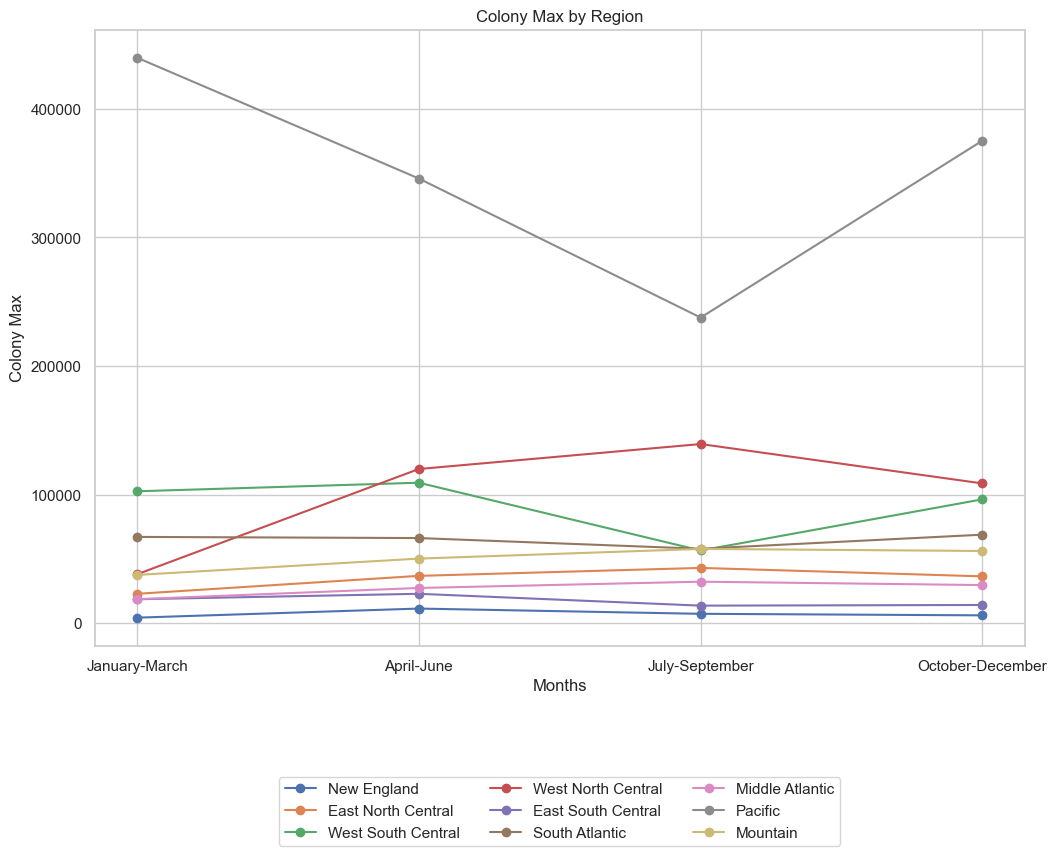

In [416]:
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_no_us.groupby(['Division','months']).agg({
    'colony_max': 'mean',  # Take the maximum value of a year
    'colony_lost': 'mean',
    'colony_lost_pct': 'mean',
    'colony_added': 'mean'
}).reset_index()
# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
abey_colonie_filter_by_month_group_by_region['months'] = pd.Categorical(abey_colonie_filter_by_month_group_by_region['months'], categories=custom_order, ordered=True)
abey_colonie_filter_by_month_group_by_region = abey_colonie_filter_by_month_group_by_region.sort_values(['months'])
abey_colonie_filter_by_month_group_by_region

# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # if region_iterate != "Pacific":
    #     # Filter data for the current state
    #     state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    #     ax.plot(state_data['months'], state_data['colony_max'], label=region_iterate, marker='o', markersize=6)
    # # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_max'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Max')
ax.set_title('Colony Max by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

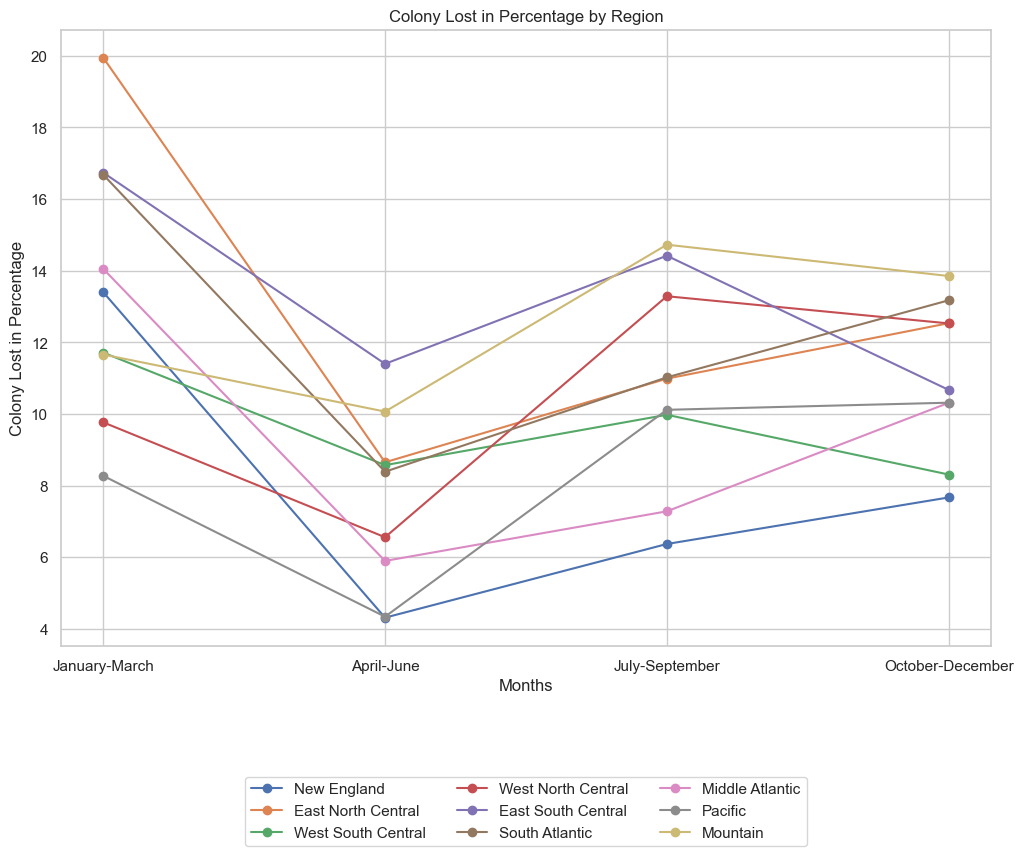

In [417]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_lost_pct'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost in Percentage')
ax.set_title('Colony Lost in Percentage by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

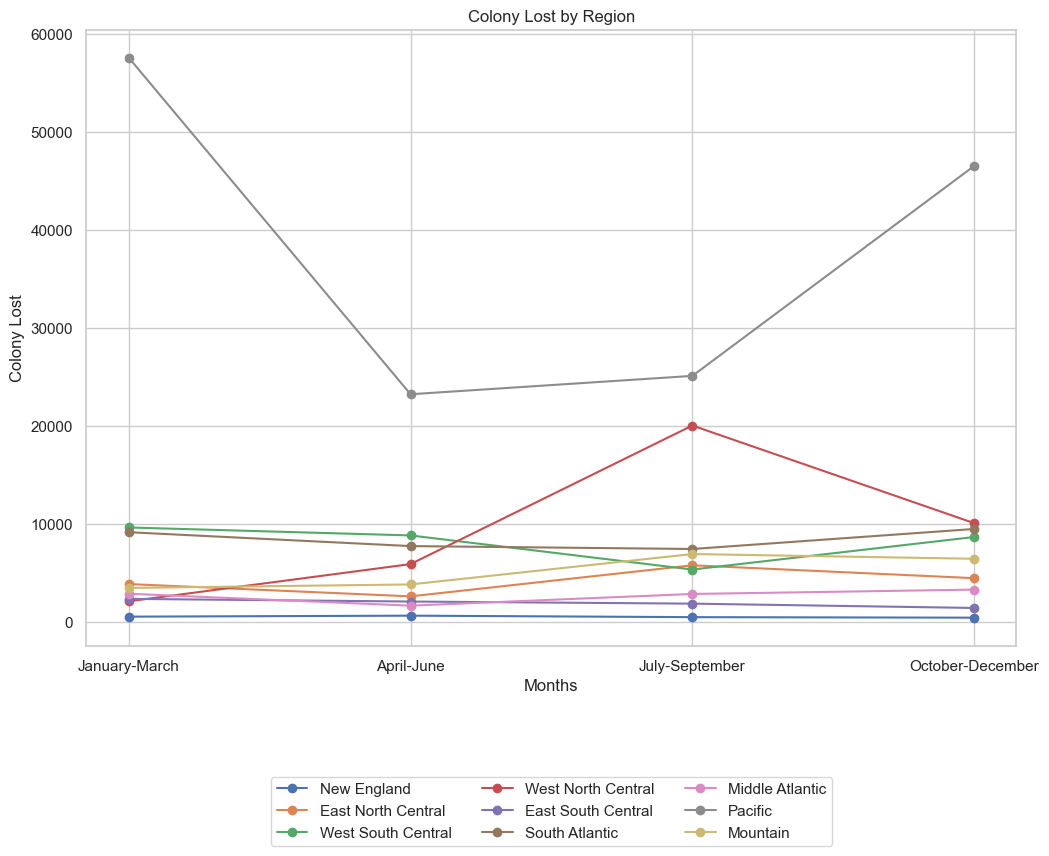

In [418]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_lost'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony Lost')
ax.set_title('Colony Lost by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

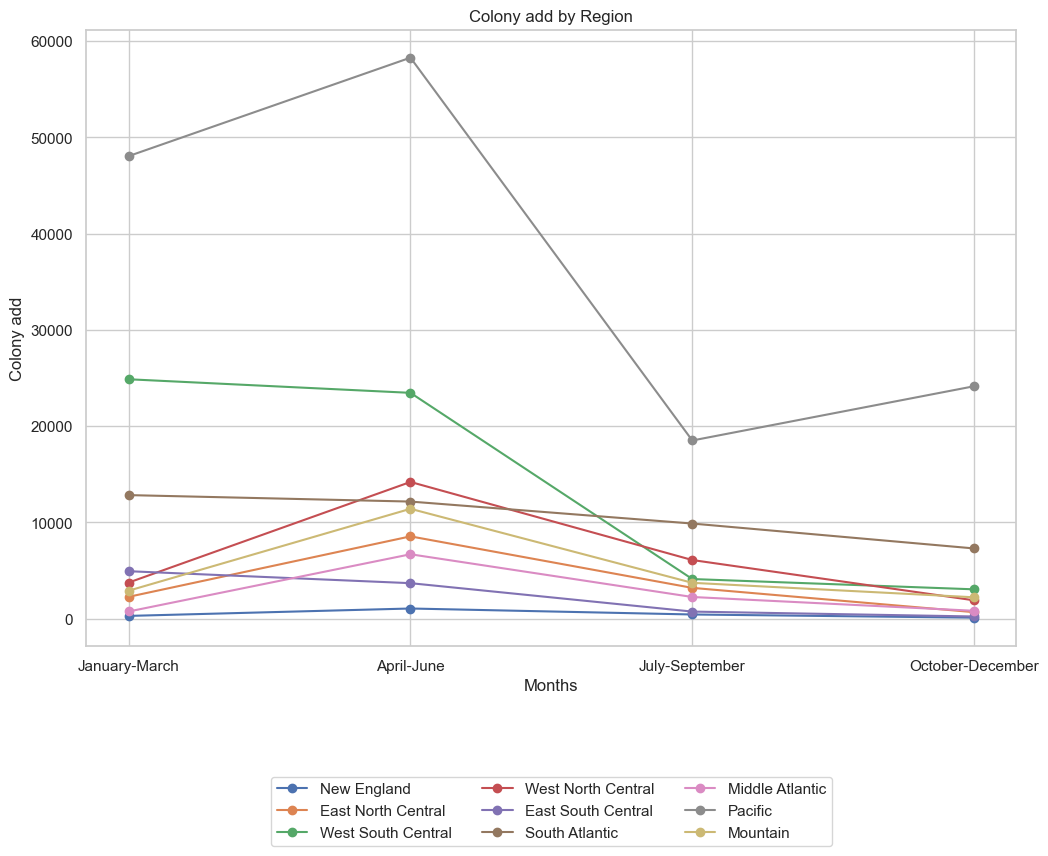

In [419]:
# Clear the current figure
plt.clf()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the states to create lines
for region_iterate in abey_colonie_filter_by_month_group_by_region.Division.unique():
    # Filter data for the current state
    state_data = abey_colonie_filter_by_month_group_by_region[abey_colonie_filter_by_month_group_by_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['colony_added'], label=region_iterate, marker='o', markersize=6)

# Customize the plot
ax.set_xlabel('Months')
ax.set_ylabel('Colony add')
ax.set_title('Colony add by Region')

# Set the x-axis ticks and labels in the custom order
ax.set_xticks(custom_order)
ax.set_xticklabels(custom_order)

# Place the legend horizontally and under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()

In [420]:
Disesases_spe = Disesases_spe.merge(region, left_on=['state'], right_on=['State'])
Disesases_spe

,year,months,state,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,...,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites,State,State Code,Region,Division
0,2015,January-March,New Jersey,30.4,19.5,13.2,11.1,16.7,40.1,1100.0,...,334.40,214.50,145.20,122.10,183.70,441.10,New Jersey,NJ,Northeast,Middle Atlantic
1,2020,April-June,New Jersey,22.1,22.3,0.8,0.1,0.1,7.2,760.0,...,167.96,169.48,6.08,0.76,0.76,54.72,New Jersey,NJ,Northeast,Middle Atlantic
2,2015,July-September,New Mexico,55.0,55.5,55.0,58.0,0.7,61.2,1600.0,...,880.00,888.00,880.00,928.00,11.20,979.20,New Mexico,NM,West,Mountain
3,2016,January-March,New Mexico,31.5,1.5,0.4,0.0,0.3,69.0,1700.0,...,535.50,25.50,6.80,0.00,5.10,1173.00,New Mexico,NM,West,Mountain
4,2016,July-September,New Mexico,55.2,1.7,55.4,24.1,0.7,59.5,1100.0,...,607.20,18.70,609.40,265.10,7.70,654.50,New Mexico,NM,West,Mountain
5,2017,April-June,New Mexico,72.9,35.6,0.6,0.0,0.6,88.4,1700.0,...,1239.30,605.20,10.20,0.00,10.20,1502.80,New Mexico,NM,West,Mountain
6,2017,January-March,New Mexico,87.4,2.0,0.0,0.0,0.0,93.9,2100.0,...,1835.40,42.00,0.00,0.00,0.00,1971.90,New Mexico,NM,West,Mountain
7,2015,July-September,Utah,41.6,3.6,25.0,33.6,0.1,40.1,8000.0,...,3328.00,288.00,2000.00,2688.00,8.00,3208.00,Utah,UT,West,Mountain
8,2015,October-December,Colorado,21.2,8.4,24.4,19.7,1.8,47.6,2500.0,...,530.00,210.00,610.00,492.50,45.00,1190.00,Colorado,CO,West,Mountain
9,2016,October-December,Montana,32.9,33.3,39.4,13.7,33.1,59.1,16000.0,...,5264.00,5328.00,6304.00,2192.00,5296.00,9456.00,Montana,MT,West,Mountain


In [421]:
Other_pet_parasites_spe = Other_pet_parasites_spe.merge(region, left_on=['state'], right_on=['State'])
Other_pet_parasites_spe

,year,months,state,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,...,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites,State,State Code,Region,Division
0,2015,April-June,Alabama,0.0,3.2,42.5,2.3,4.1,16.7,860.0,...,0.00,27.52,365.50,19.78,35.26,143.62,Alabama,AL,South,East South Central
1,2015,July-September,Alabama,0.0,2.2,70.6,2.6,17.7,63.1,1400.0,...,0.00,30.80,988.40,36.40,247.80,883.40,Alabama,AL,South,East South Central
2,2016,January-March,Alabama,4.3,2.4,22.0,8.1,11.3,24.2,1700.0,...,73.10,40.80,374.00,137.70,192.10,411.40,Alabama,AL,South,East South Central
3,2016,July-September,Alabama,0.0,3.2,42.0,3.8,13.8,11.7,1200.0,...,0.00,38.40,504.00,45.60,165.60,140.40,Alabama,AL,South,East South Central
4,2017,July-September,Alabama,0.0,7.5,22.1,35.4,3.9,69.5,900.0,...,0.00,67.50,198.90,318.60,35.10,625.50,Alabama,AL,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020,April-June,South Dakota,4.8,37.5,31.4,0.4,5.3,53.4,4600.0,...,220.80,1725.00,1444.40,18.40,243.80,2456.40,South Dakota,SD,Midwest,West North Central
192,2018,July-September,West Virginia,0.3,6.8,52.6,0.3,2.1,57.0,520.0,...,1.56,35.36,273.52,1.56,10.92,296.40,West Virginia,WV,South,South Atlantic
193,2018,October-December,Indiana,23.8,35.4,21.3,64.6,2.3,51.3,3300.0,...,785.40,1168.20,702.90,2131.80,75.90,1692.90,Indiana,IN,Midwest,East North Central
194,2019,October-December,Illinois,1.1,8.9,27.3,3.4,8.9,28.9,1700.0,...,18.70,151.30,464.10,57.80,151.30,491.30,Illinois,IL,Midwest,East North Central


In [422]:
Pesticides_spe = Pesticides_spe.merge(region, left_on=['state'], right_on=['State'])
Pesticides_spe

,year,months,state,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,...,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites,State,State Code,Region,Division
0,2015,April-June,Arizona,0.5,28.2,32.1,20.1,0.3,8.4,5500.0,...,27.5,1551.0,1765.5,1105.5,16.5,462.0,Arizona,AZ,West,Mountain
1,2019,October-December,Arizona,0.4,4.0,1.5,23.3,2.9,53.9,7000.0,...,28.0,280.0,105.0,1631.0,203.0,3773.0,Arizona,AZ,West,Mountain
2,2015,April-June,Arkansas,7.0,27.4,63.4,22.6,9.3,65.9,1900.0,...,133.0,520.6,1204.6,429.4,176.7,1252.1,Arkansas,AR,South,West South Central
3,2017,October-December,Arkansas,26.6,24.1,29.2,31.0,0.4,37.5,7500.0,...,1995.0,1807.5,2190.0,2325.0,30.0,2812.5,Arkansas,AR,South,West South Central
4,2018,January-March,Arkansas,1.0,4.6,9.6,23.0,13.9,21.1,7500.0,...,75.0,345.0,720.0,1725.0,1042.5,1582.5,Arkansas,AR,South,West South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2018,July-September,Oregon,7.0,10.7,2.8,45.1,0.8,57.2,13000.0,...,910.0,1391.0,364.0,5863.0,104.0,7436.0,Oregon,OR,West,Pacific
93,2019,January-March,Mississippi,64.8,1.9,71.0,48.4,5.5,14.6,2400.0,...,1555.2,45.6,1704.0,1161.6,132.0,350.4,Mississippi,MS,South,East South Central
94,2019,July-September,Mississippi,2.4,4.0,45.6,25.4,5.1,59.1,2900.0,...,69.6,116.0,1322.4,736.6,147.9,1713.9,Mississippi,MS,South,East South Central
95,2019,July-September,Louisiana,0.4,2.5,66.8,57.0,2.7,67.1,4100.0,...,16.4,102.5,2738.8,2337.0,110.7,2751.1,Louisiana,LA,South,West South Central


In [423]:
perturbation_factor_by_year_no_us = perturbation_factor_by_year_no_us.merge(region, left_on=['state'], right_on=['State'])

In [424]:
# Group by 'Division,' 'year,'
perturbation_factor_by_year_and_region = perturbation_factor_by_year_no_us.groupby(['Division', 'year']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'sum',
    'Disesases':'sum',
    'Other':'sum',
    'Other pests/parasites':'sum',
    'Pesticides':'sum',
    'Unknown':'sum',
    'Varroa mites':'sum',
}).reset_index()

perturbation_factor_by_year_and_region

,Division,year,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites
0,East North Central,2015,2.510000,8.255000,6.54500,7.34500,7.040000,23.245000,95690.0,2377.17,9497.00,7524.55,8129.11,6930.89,25388.96
1,East North Central,2016,2.330000,6.040000,8.14000,6.35000,7.320000,31.445000,84350.0,3045.47,5926.36,8771.27,7387.29,7561.81,33132.10
2,East North Central,2017,4.970000,7.370000,10.98000,8.59500,5.640000,30.585000,89730.0,7929.02,7834.94,12642.87,11357.17,5877.00,37508.97
3,East North Central,2018,5.290000,11.265000,16.08500,12.67500,5.655000,40.515000,79250.0,4676.32,9585.50,14125.74,12857.40,5332.95,35322.37
4,East North Central,2019,5.173333,8.760000,13.70000,6.30000,4.733333,34.226667,58450.0,4485.24,5139.31,8296.30,4309.25,2418.17,21092.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,West South Central,2017,3.843750,5.912500,17.93750,6.77500,3.050000,29.687500,129760.0,4570.10,8628.72,33266.50,12030.33,5355.95,47782.35
59,West South Central,2018,2.150000,5.075000,12.81250,11.88125,5.906250,29.506250,112040.0,4853.91,5651.88,14169.10,9701.31,9147.29,28816.89
60,West South Central,2019,2.491667,4.508333,15.70000,16.40000,7.525000,32.258333,69080.0,2671.03,3696.33,9947.37,10687.83,2723.92,19868.05
61,West South Central,2020,1.568750,3.762500,8.98125,4.92500,4.425000,26.231250,133900.0,1854.80,6612.50,10489.50,6246.10,8111.30,31820.60


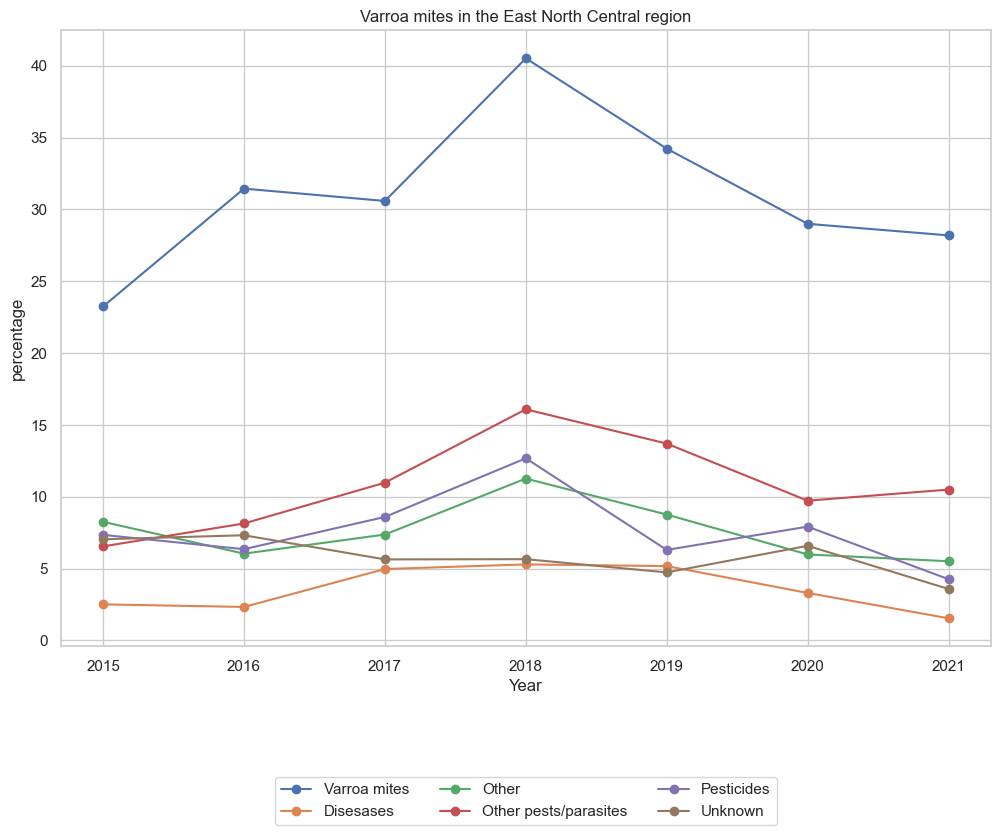

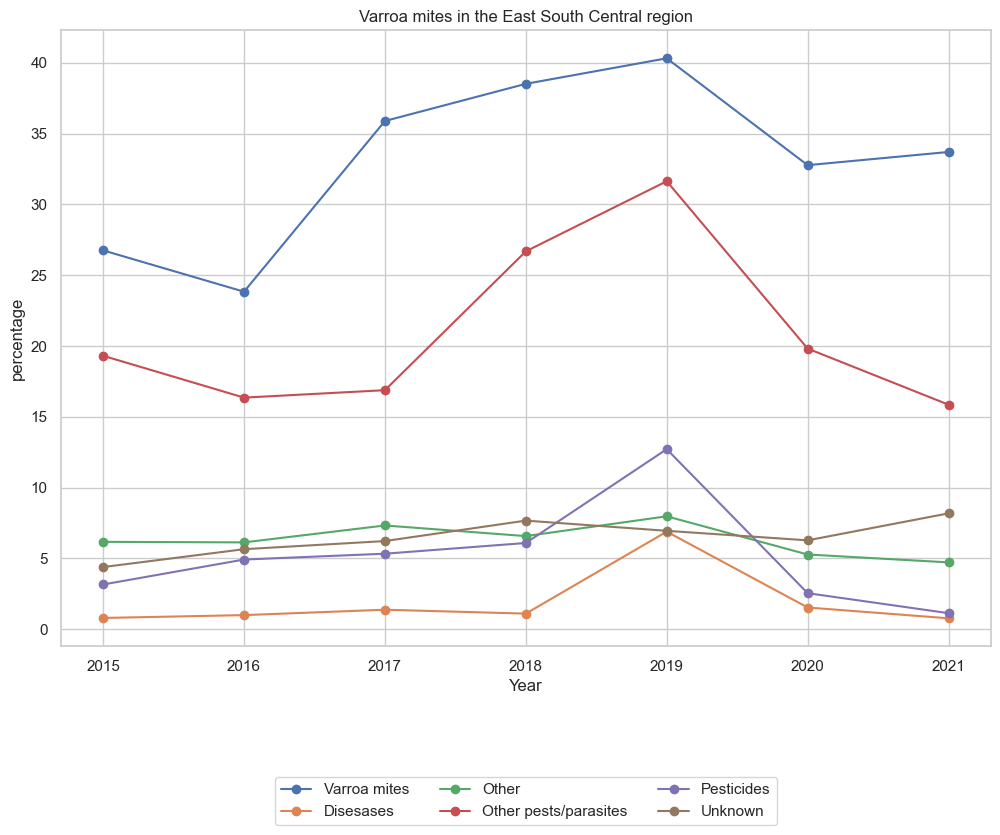

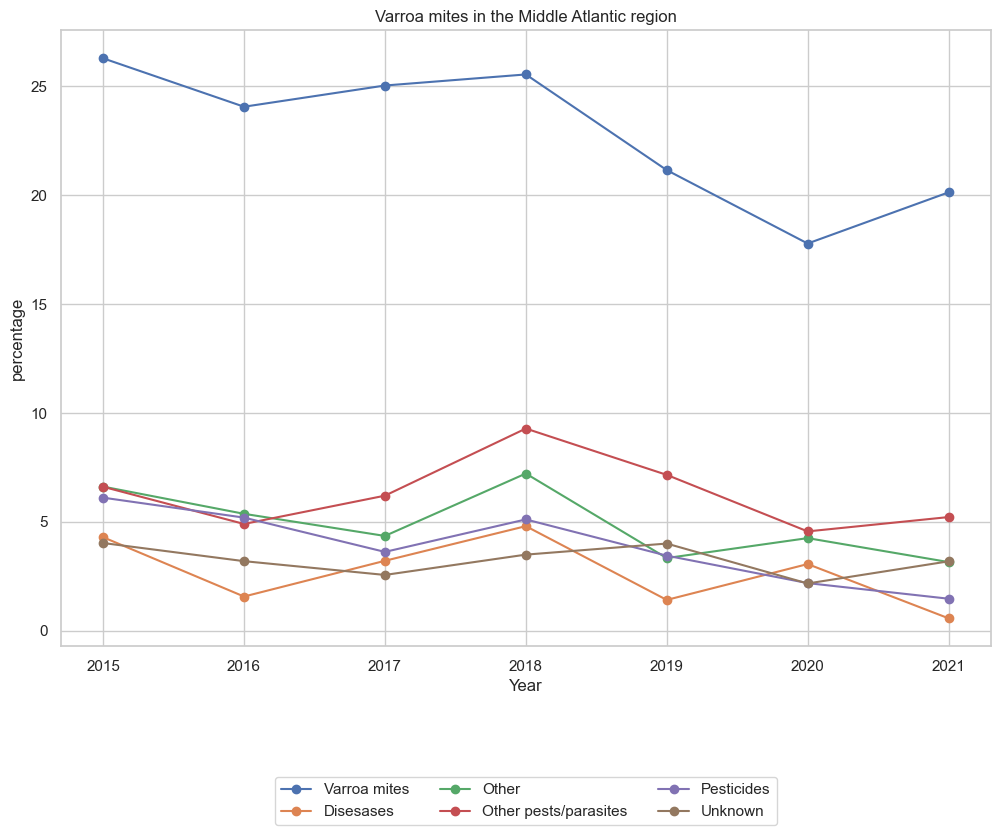

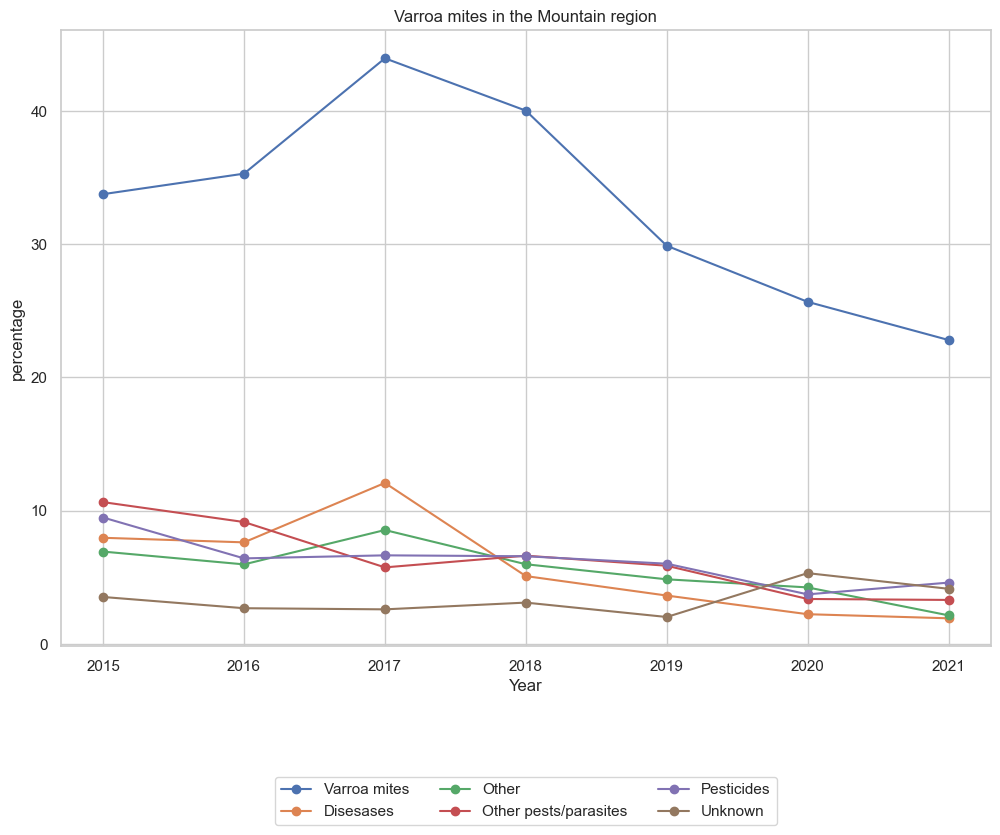

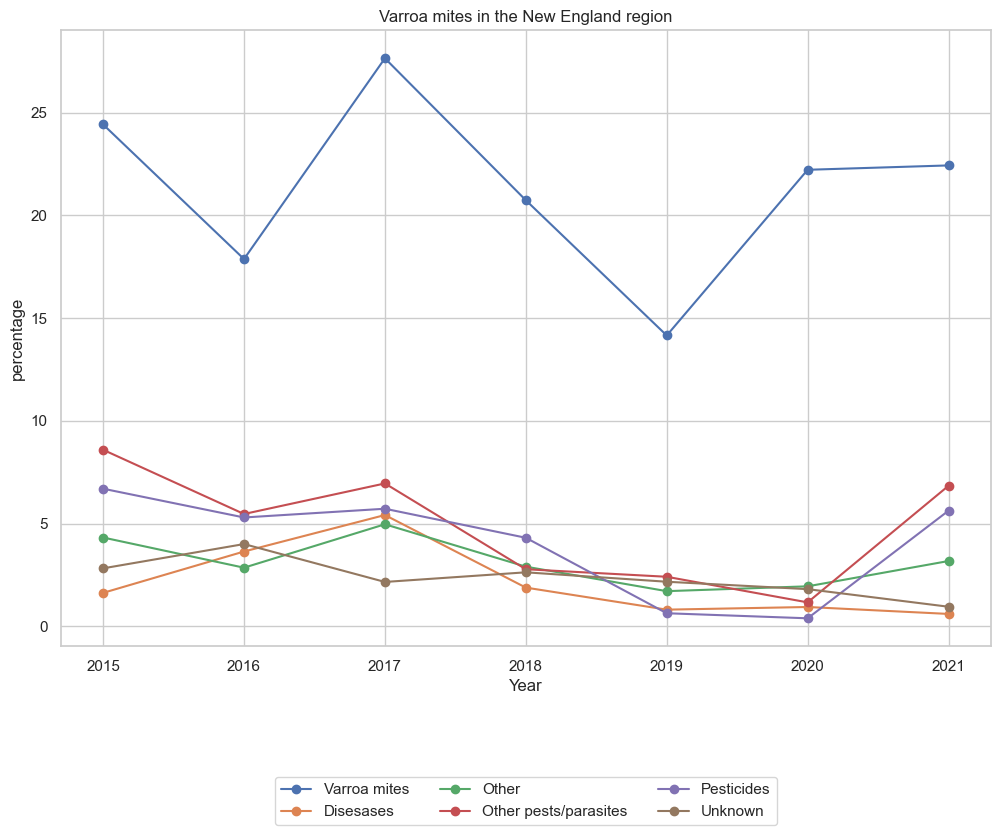

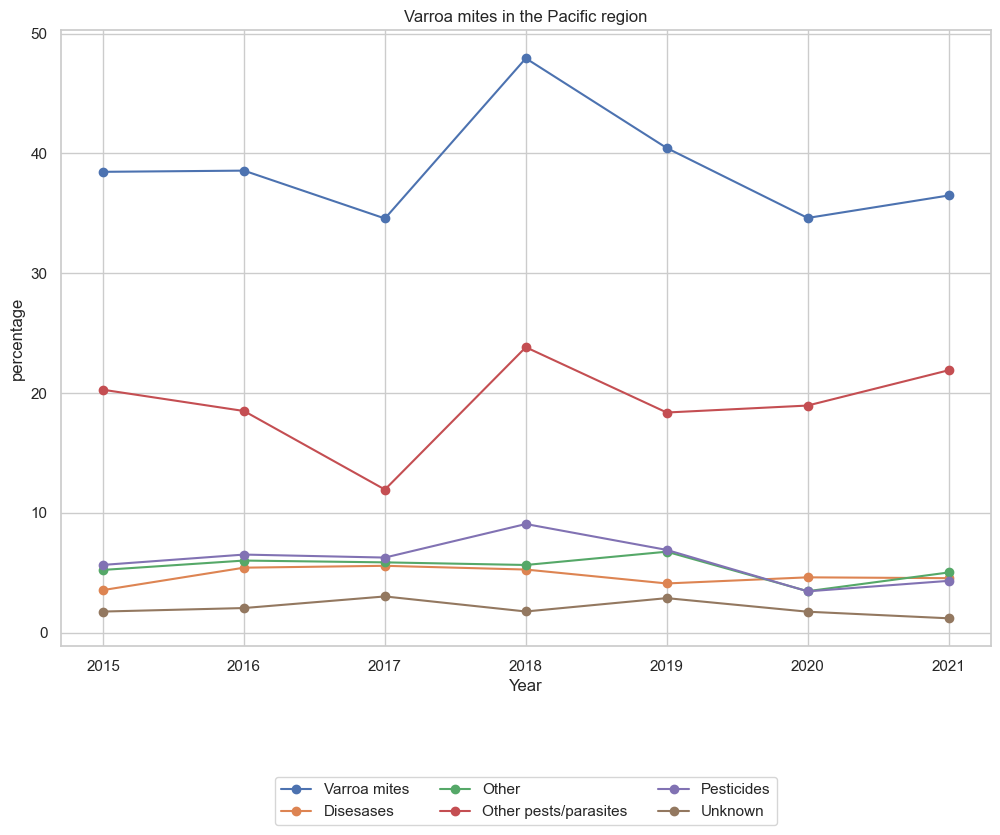

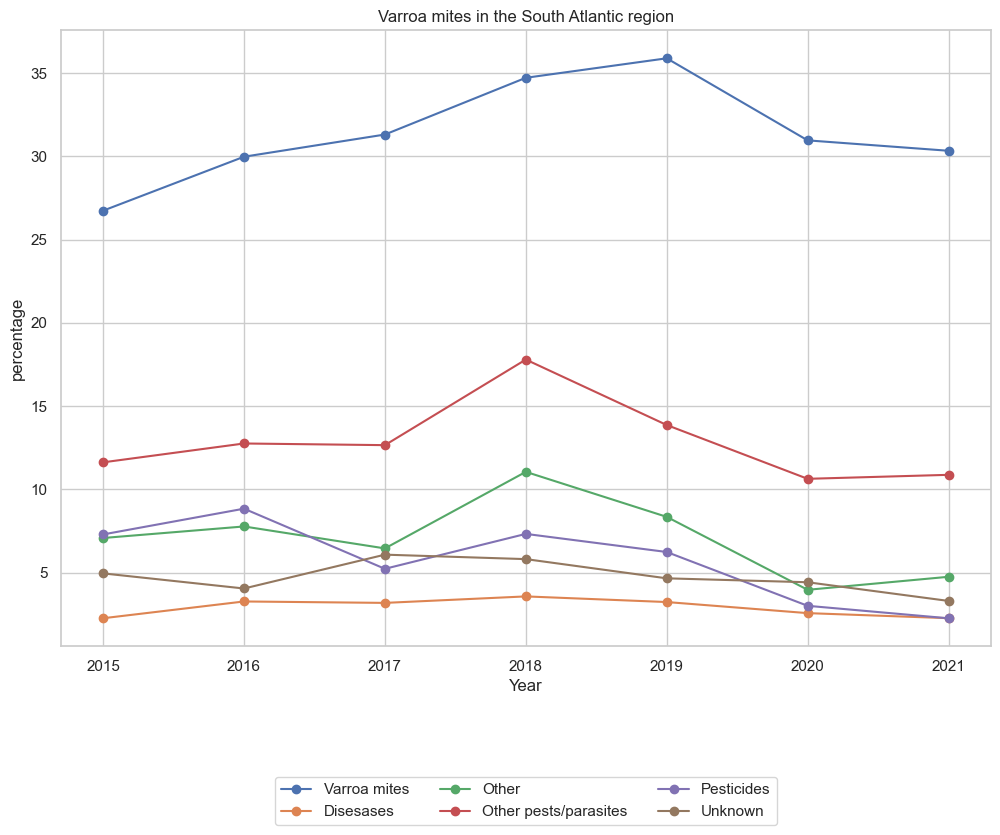

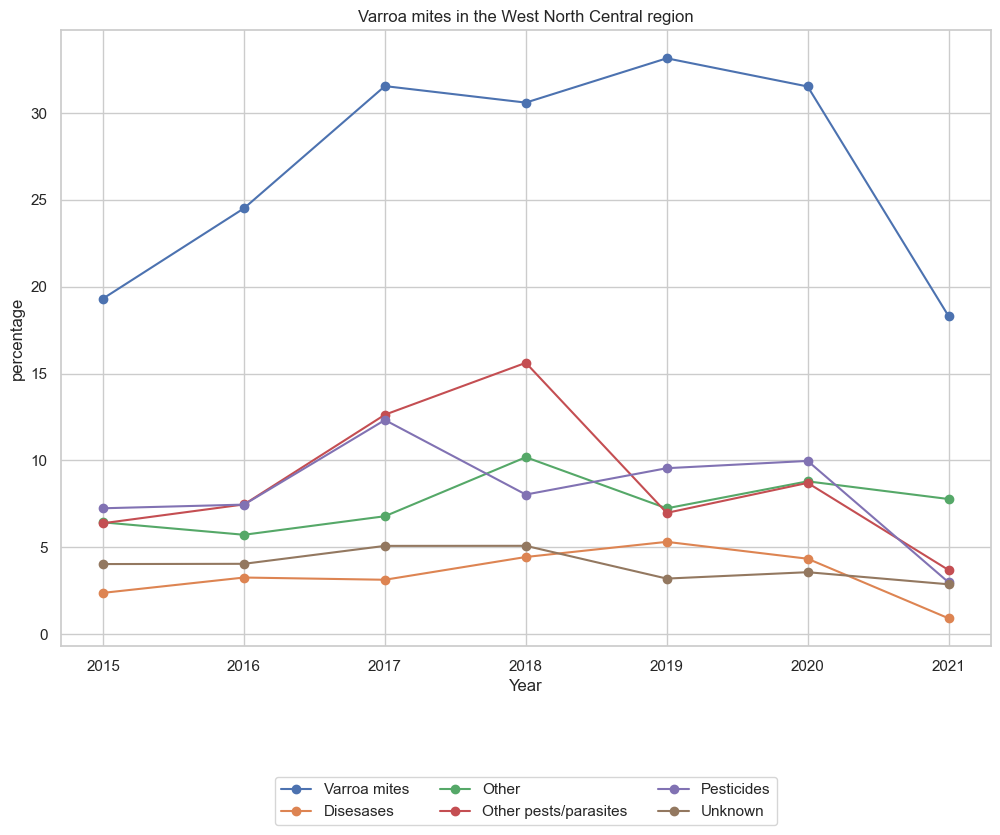

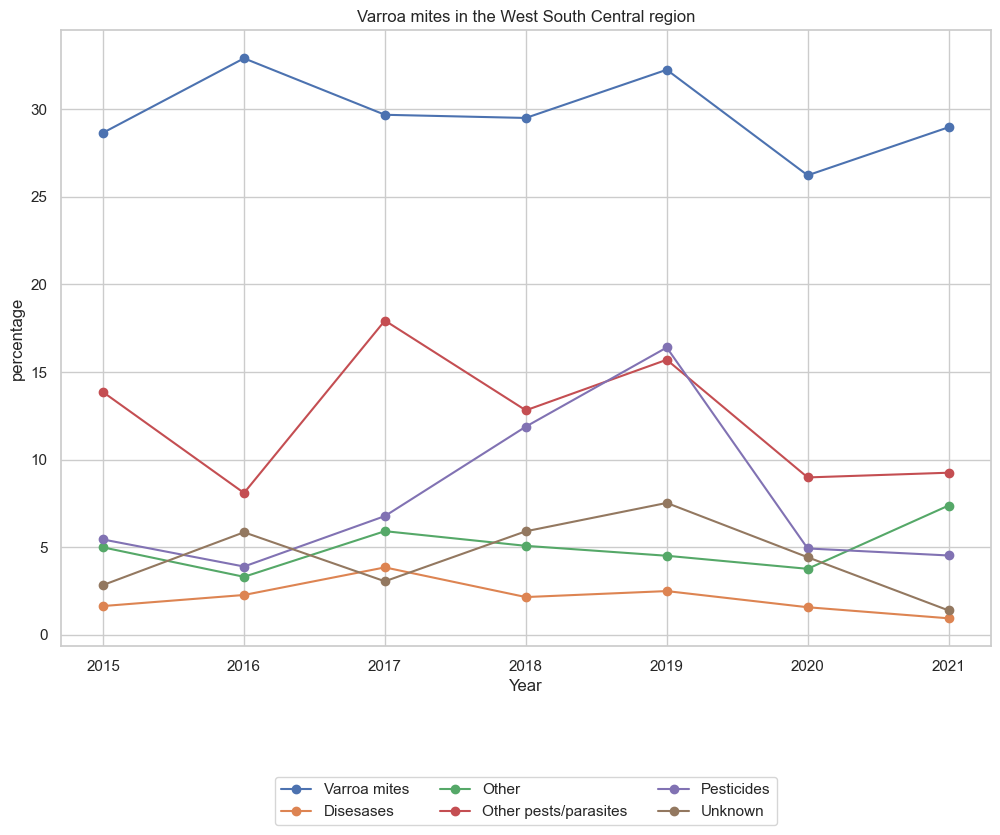

In [425]:
# Iterate through the states to create lines
for region_iterate in perturbation_factor_by_year_and_region.Division.unique():
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Filter data for the current state
    state_data = perturbation_factor_by_year_and_region[perturbation_factor_by_year_and_region['Division'] == region_iterate]
    ax.plot(state_data['year'], state_data['Varroa mites pct'], label='Varroa mites', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Disesases pct'], label='Disesases', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Other pct'], label='Other', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Other pests/parasites pct'], label='Other pests/parasites', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Pesticides pct'], label='Pesticides', marker='o', markersize=6)
    ax.plot(state_data['year'], state_data['Unknown pct'], label='Unknown', marker='o', markersize=6)
    # Customize the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('percentage')
    ax.set_title(f'Varroa mites in the {region_iterate} region')

    # Place the legend horizontally and under the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Show the plot
    plt.show()

In [426]:
perturbation_factor_by_month_no_us = perturbation_factor_by_month_no_us.merge(region, left_on=['state'], right_on=['State'])
perturbation_factor_by_month_no_us

,state,months,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites,State,State Code,Region,Division
0,Alabama,April-June,0.600000,7.100000,25.466667,5.183333,8.733333,25.250000,1640.000000,15.268333,114.528333,443.525000,88.763333,202.885000,526.953333,Alabama,AL,South,East South Central
1,Alabama,January-March,1.171429,5.071429,17.842857,4.171429,7.557143,24.357143,1168.571429,14.797143,65.634286,202.618571,51.348571,98.390000,275.668571,Alabama,AL,South,East South Central
2,Alabama,July-September,0.600000,5.966667,42.966667,11.433333,10.050000,52.883333,1648.333333,6.768333,94.188333,698.556667,182.463333,176.726667,945.173333,Alabama,AL,South,East South Central
3,Alabama,October-December,4.416667,4.316667,19.466667,3.416667,7.683333,25.966667,800.000000,45.618333,31.283333,170.165000,29.450000,67.655000,225.451667,Alabama,AL,South,East South Central
4,Arizona,April-June,12.316667,15.466667,17.083333,8.416667,2.616667,28.383333,3316.666667,363.783333,577.350000,686.400000,332.083333,93.000000,796.883333,Arizona,AZ,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Wisconsin,October-December,10.316667,10.650000,19.283333,16.883333,16.083333,45.166667,7916.666667,851.916667,864.083333,1566.250000,1338.250000,1217.750000,3534.583333,Wisconsin,WI,Midwest,East North Central
176,Wyoming,April-June,2.683333,4.350000,4.133333,2.850000,2.183333,18.683333,2350.000000,39.800000,97.133333,118.250000,77.033333,52.316667,366.100000,Wyoming,WY,West,Mountain
177,Wyoming,January-March,0.100000,1.285714,0.142857,0.471429,2.071429,0.414286,1178.571429,1.212857,14.584286,0.388571,1.602857,21.438571,4.172857,Wyoming,WY,West,Mountain
178,Wyoming,July-September,3.733333,3.733333,3.150000,4.583333,2.216667,30.566667,4250.000000,152.750000,163.083333,116.866667,189.733333,96.733333,1307.916667,Wyoming,WY,West,Mountain


In [427]:
# Group by 'Division,' 'months,'
perturbation_factor_by_month_and_region = perturbation_factor_by_month_no_us.groupby(['Division', 'months']).agg({
    'Disesases pct':'mean',
    'Other pct':'mean',
    'Other pests/parasites pct':'mean',
    'Pesticides pct':'mean',
    'Unknown pct':'mean',
    'Varroa mites pct':'mean',
    'colony_lost':'mean',
    'Disesases':'mean',
    'Other':'mean',
    'Other pests/parasites':'mean',
    'Pesticides':'mean',
    'Unknown':'mean',
    'Varroa mites':'mean',
}).reset_index()

# Define the custom order for months
custom_order = ['January-March', 'April-June', 'July-September', 'October-December']

# Order the DataFrame by the custom order for months
perturbation_factor_by_month_and_region['months'] = pd.Categorical(perturbation_factor_by_month_and_region['months'], categories=custom_order, ordered=True)
perturbation_factor_by_month_and_region = perturbation_factor_by_month_and_region.sort_values(['months'])

perturbation_factor_by_month_and_region

,Division,months,Disesases pct,Other pct,Other pests/parasites pct,Pesticides pct,Unknown pct,Varroa mites pct,colony_lost,Disesases,Other,Other pests/parasites,Pesticides,Unknown,Varroa mites
17,New England,January-March,1.821429,5.960714,2.350000,0.867857,2.682143,14.464286,565.357143,16.778214,45.242857,18.652143,8.349643,16.052143,95.836429
1,East North Central,January-March,1.605714,8.288571,5.482857,2.148571,6.771429,20.174286,3890.857143,58.834000,338.907143,183.562000,93.993143,251.786286,749.578286
33,West South Central,January-March,1.857143,3.332143,8.321429,5.460714,4.621429,23.207143,9660.714286,274.464286,409.608929,1044.180357,638.069643,427.244643,2284.767857
29,West North Central,January-March,1.442857,6.163265,4.097959,2.393878,4.051020,16.246939,2131.632653,32.938367,122.961837,64.674082,50.777755,114.263878,277.745306
5,East South Central,January-March,3.242857,7.385714,17.696429,4.446429,8.300000,25.317857,2381.071429,73.077500,174.466786,404.626429,95.107500,184.902500,543.207857
25,South Atlantic,January-March,1.777551,7.742857,8.191837,4.044898,5.312245,25.097959,9178.163265,269.364082,648.248163,1135.572449,830.914898,616.735918,2981.741020
9,Middle Atlantic,January-March,2.890476,6.723810,4.914286,2.742857,6.109524,19.542857,2901.904762,72.039048,254.001429,167.566190,84.287619,208.908095,573.075714
21,Pacific,January-March,2.625000,3.975000,15.396429,3.767857,2.000000,28.878571,57576.428571,2928.444643,3995.665714,5726.791429,5153.450357,2476.181786,19030.358929
13,Mountain,January-March,4.724490,3.577551,3.483673,2.965306,2.673469,22.057143,3497.755102,187.122449,148.106531,214.548571,171.861224,79.865714,980.969388
32,West South Central,April-June,2.987500,7.195833,11.062500,5.562500,3.691667,34.520833,8849.166667,326.515000,588.625000,1073.858750,555.907500,396.002083,2604.843750


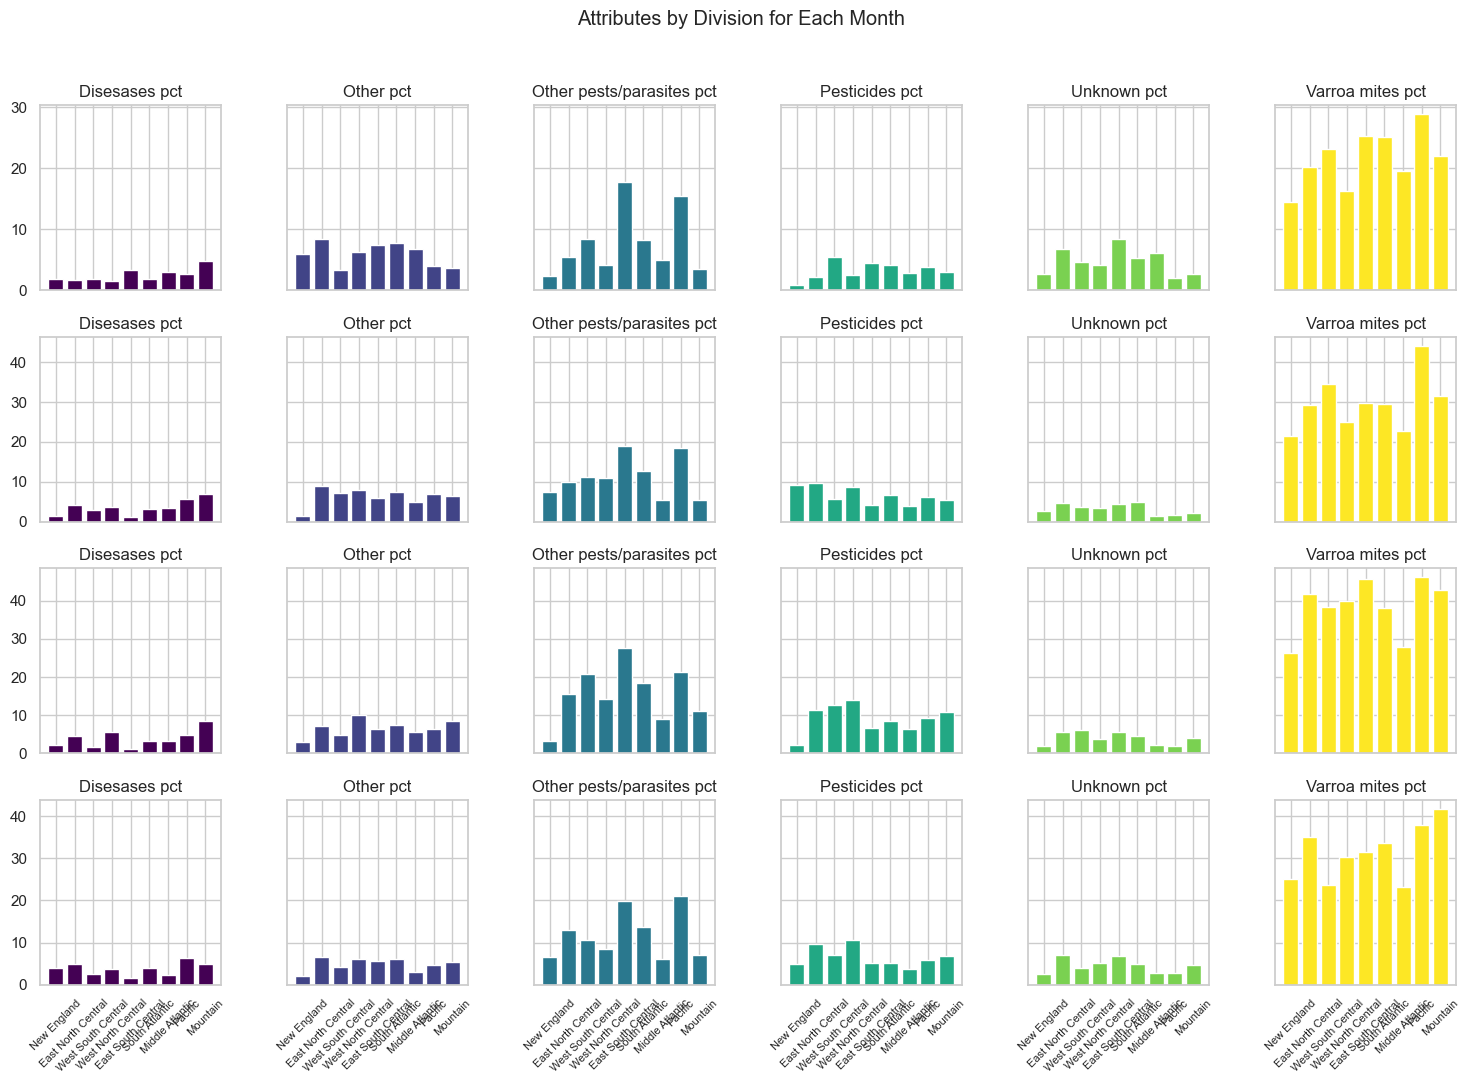

In [428]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the attributes to plot
attributes = [
    'Disesases pct',
    'Other pct',
    'Other pests/parasites pct',
    'Pesticides pct',
    'Unknown pct',
    'Varroa mites pct',
]

# Set up the figure and axis
fig, axs = plt.subplots(len(perturbation_factor_by_month_and_region['months'].unique()), len(attributes), figsize=(15, 10), sharex='col', sharey='row')

# Define colors for each attribute
colors = plt.cm.viridis(np.linspace(0, 1, len(attributes)))

# Iterate through months and attributes to create grouped bar charts
for i, month in enumerate(perturbation_factor_by_month_and_region['months'].unique()):
    # Filter data for the current month
    month_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['months'] == month]

    for j, attribute in enumerate(attributes):
        # Plot a grouped bar chart for each attribute with different color
        axs[i, j].bar(month_data['Division'], month_data[attribute], color=colors[j], label=attribute)
        axs[i, j].set_title(attribute)

# Set labels and title
fig.suptitle('Attributes by Division for Each Month', y=1.02)
fig.tight_layout()

# Rotate x-axis labels for better readability
for ax in axs[-1, :]:
    ax.tick_params(axis='x', rotation=45, labelsize=8)

# Show the plot
plt.show()

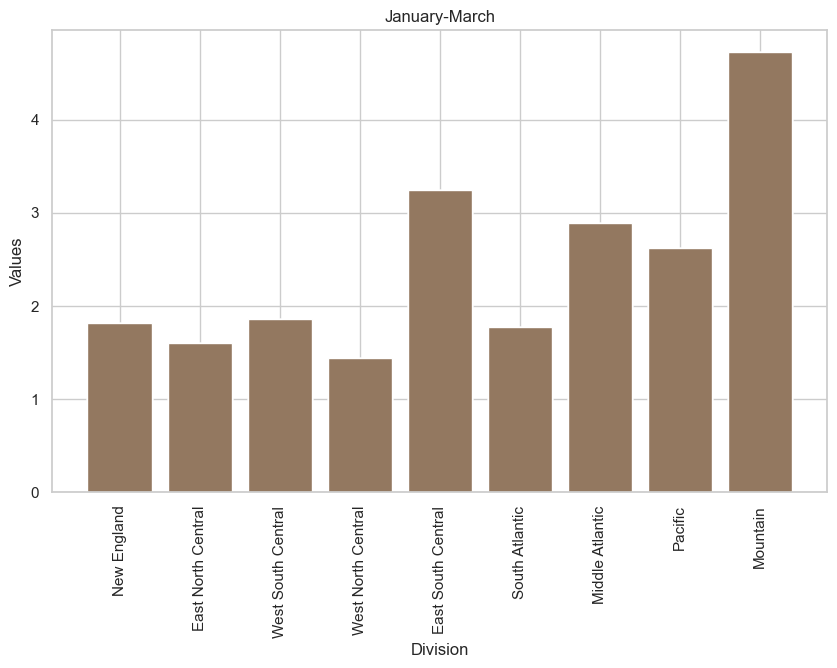

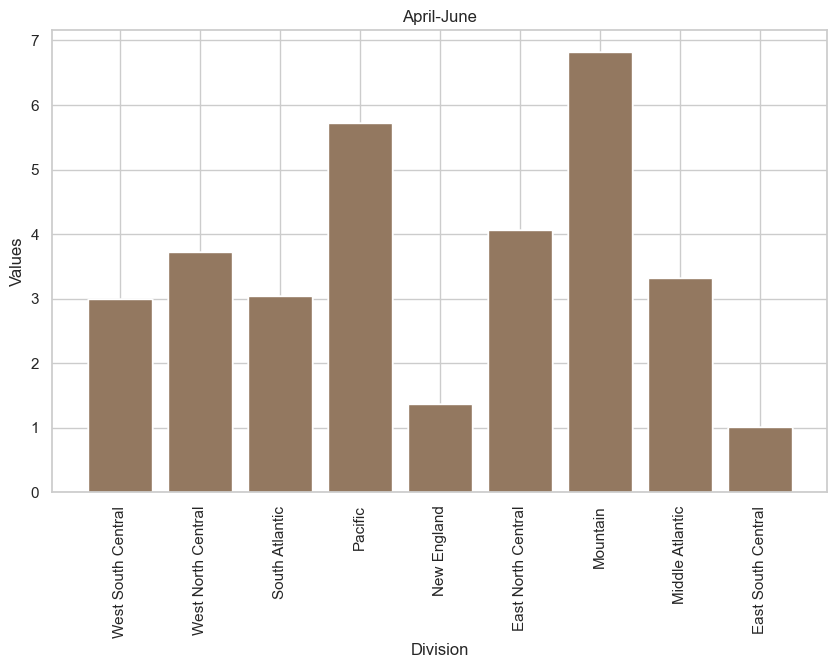

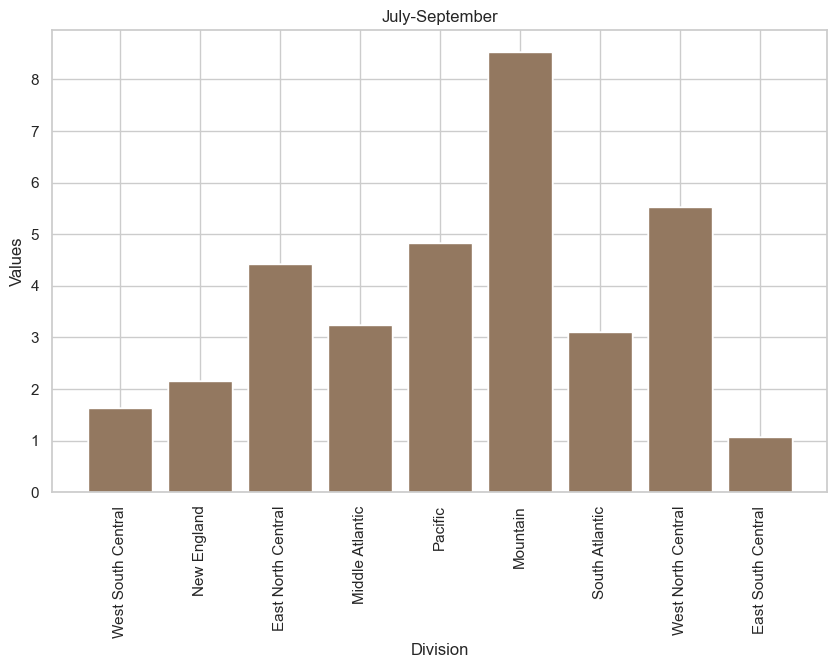

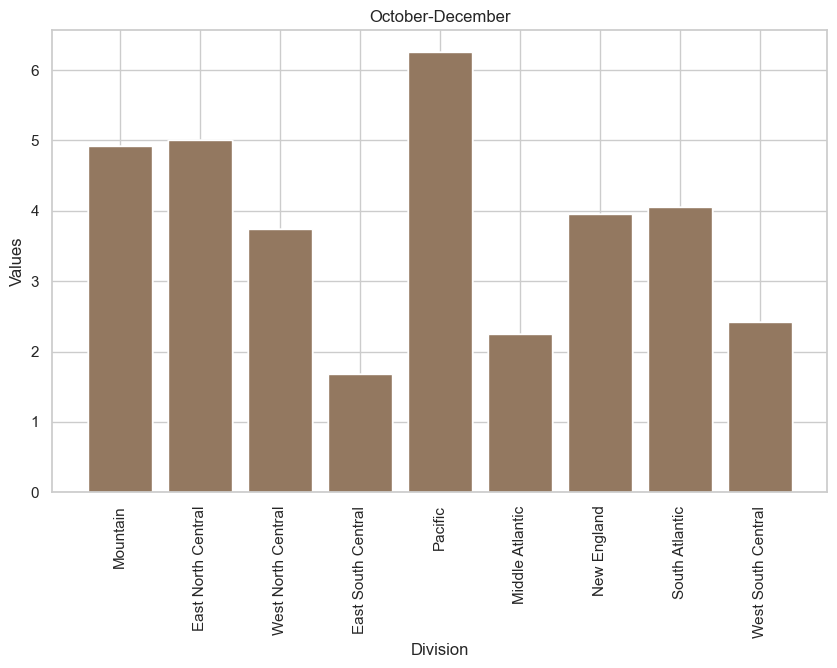

In [429]:
# Create a separate bar chart for each month
for i, month in enumerate(perturbation_factor_by_month_and_region['months'].unique()):
    plt.figure(figsize=(10, 6))
    plt.title(month)

    # Filter data for the current month
    month_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['months'] == month]

    # Plot bars for each attribute
    for attribute in attributes:
        plt.bar(month_data['Division'], month_data['Disesases pct'], label='Disesases pct')

    plt.xticks(rotation=90)
    plt.xlabel("Division")
    plt.ylabel("Values")
    plt.grid(True)

    # Show the current plot
    plt.show()

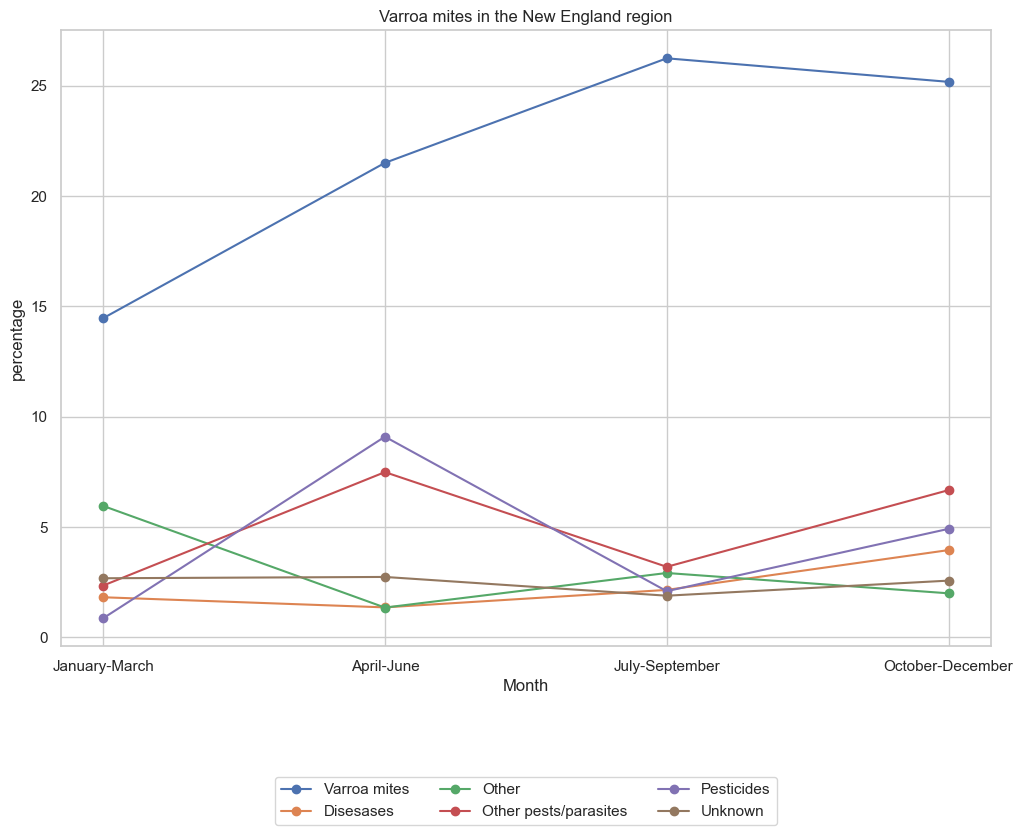

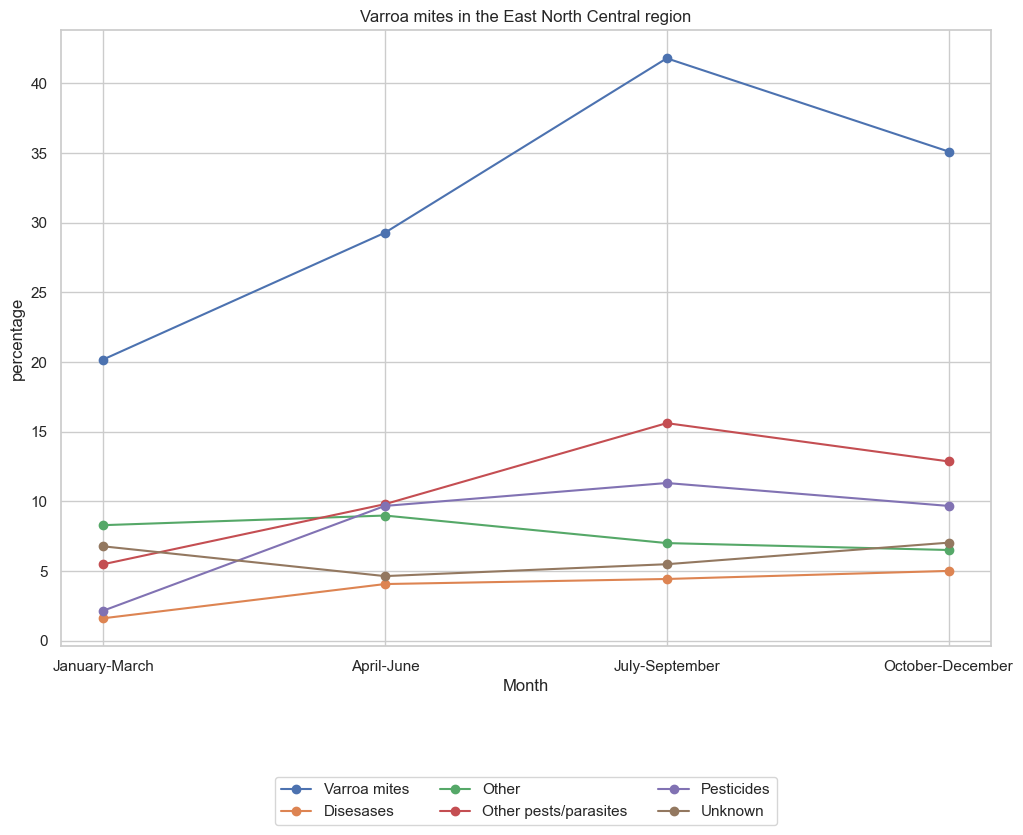

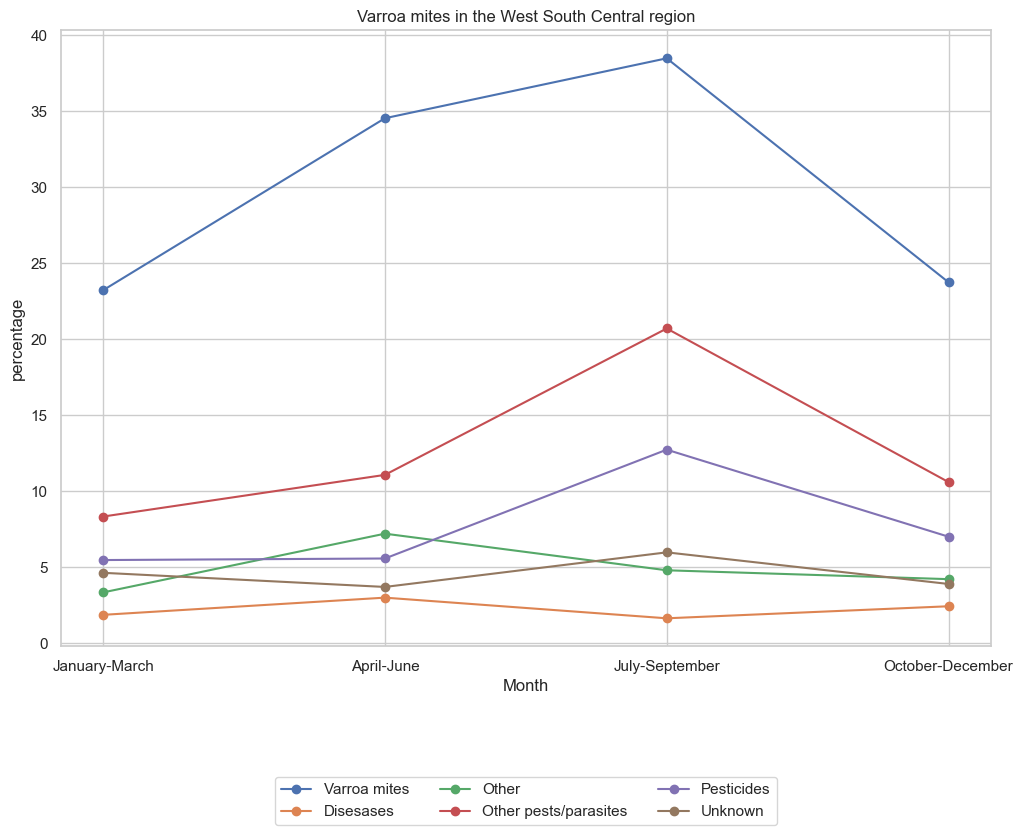

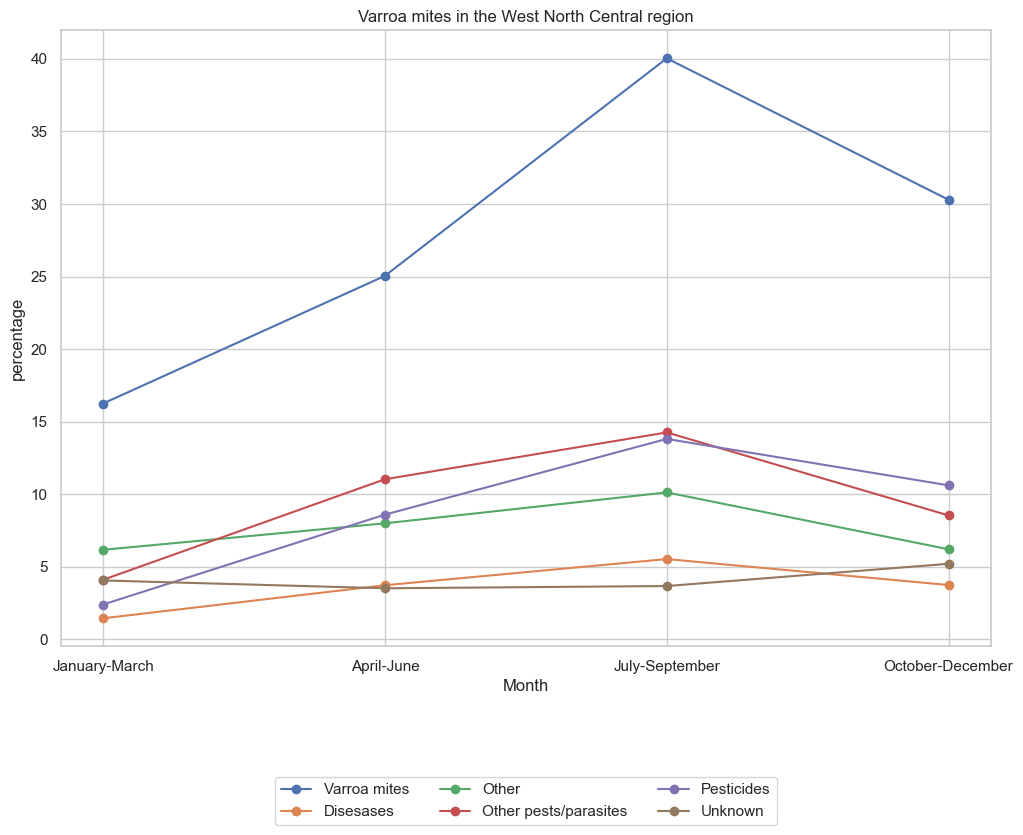

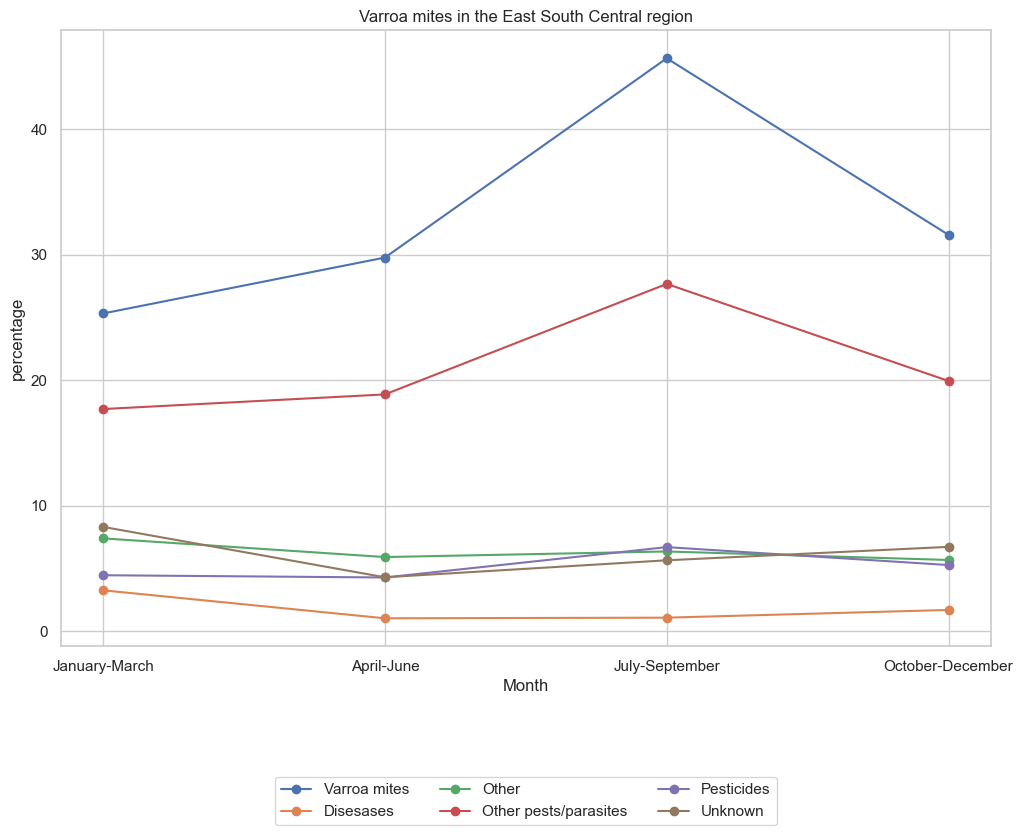

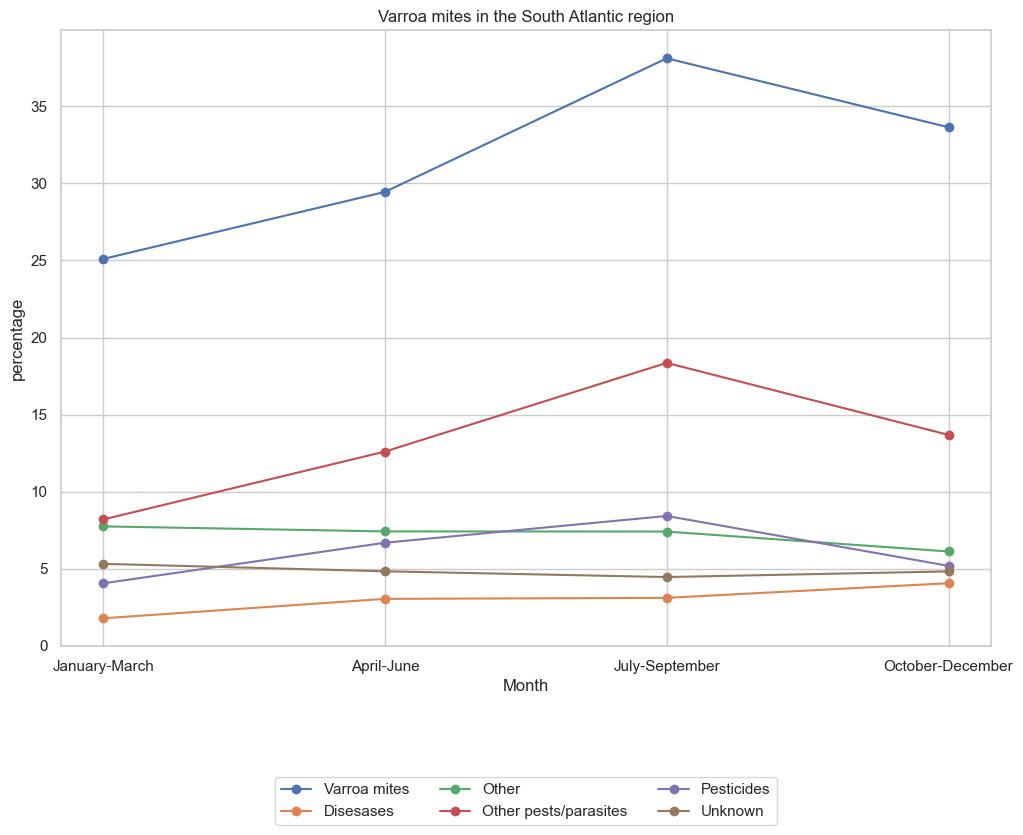

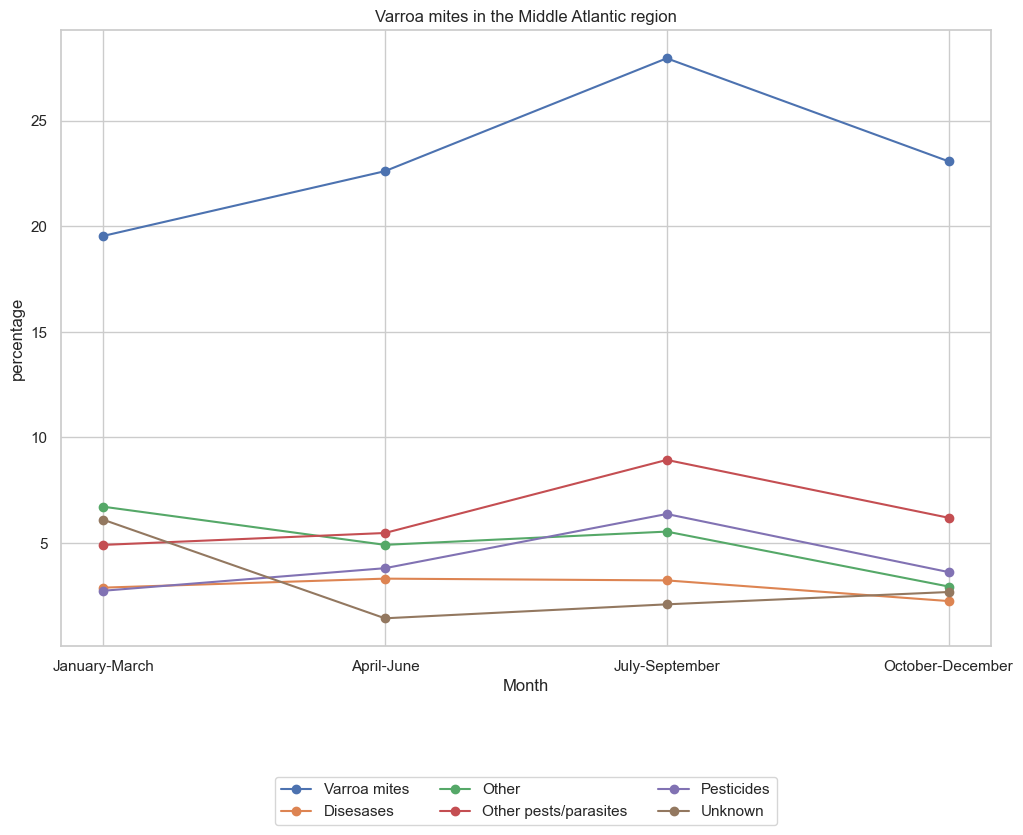

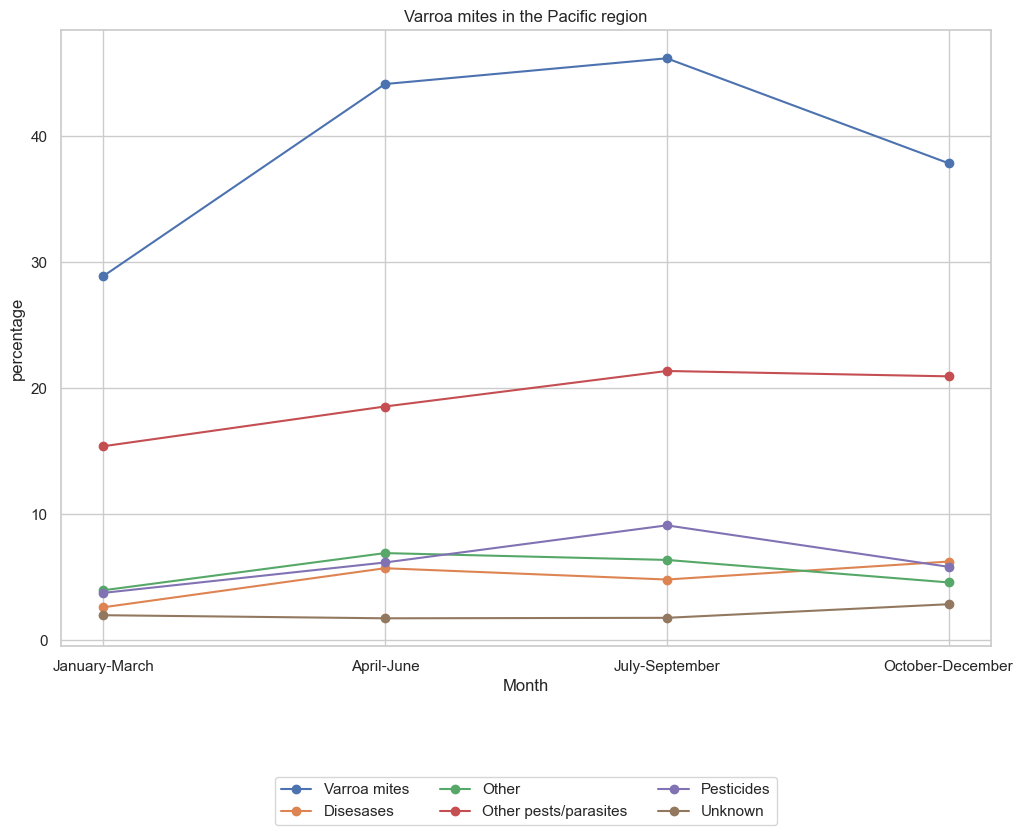

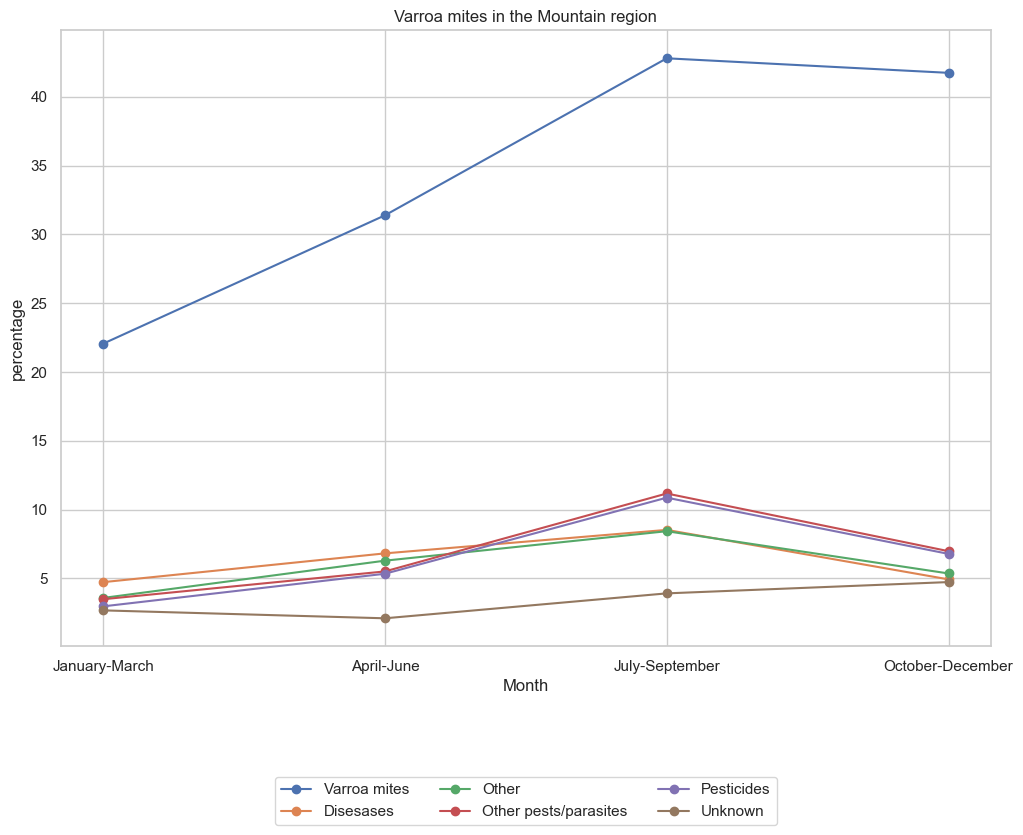

In [430]:
# Iterate through the states to create lines
for region_iterate in perturbation_factor_by_month_and_region.Division.unique():
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Filter data for the current state
    state_data = perturbation_factor_by_month_and_region[perturbation_factor_by_month_and_region['Division'] == region_iterate]
    ax.plot(state_data['months'], state_data['Varroa mites pct'], label='Varroa mites', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Disesases pct'], label='Disesases', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Other pct'], label='Other', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Other pests/parasites pct'], label='Other pests/parasites', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Pesticides pct'], label='Pesticides', marker='o', markersize=6)
    ax.plot(state_data['months'], state_data['Unknown pct'], label='Unknown', marker='o', markersize=6)
    # Customize the plot
    ax.set_xlabel('Month')
    ax.set_ylabel('percentage')
    ax.set_title(f'Varroa mites in the {region_iterate} region')

    # Place the legend horizontally and under the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Show the plot
    plt.show()

In [431]:
# Custom converter function to remove commas
def remove_commas(x):
    return str(x).replace(',', '')

# Specify the data types and converters using a dictionary
dtypes = {'Resident Population': 'string'}
converters = {'Resident Population': remove_commas}

# Read the CSV file with specified data types and converters
apportionment = pd.read_csv('us state/apportionment.csv', dtype=dtypes, converters=converters)
apportionment

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_49404\23111586.py:10: ParserWarning:

Both a converter and dtype were specified for column Resident Population - only the converter will be used.



,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,2138093,16.9,42.2,25.0,10.0,1.0,"213,809"
1,Alaska,State,1910,64356,1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,204354,66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,1574449,20.0,30.3,30.0,7.0,0.0,"224,921"
4,California,State,1910,2377549,60.1,15.3,38.0,11.0,3.0,"216,051"
...,...,...,...,...,...,...,...,...,...,...
679,Midwest Region,Region,2020,68985454,3.1,NaN,NaN,NaN,NaN,NaN
680,Northeast Region,Region,2020,57609148,4.1,NaN,NaN,NaN,NaN,NaN
681,South Region,Region,2020,126266107,10.2,NaN,NaN,NaN,NaN,NaN
682,West Region,Region,2020,78588572,9.2,NaN,NaN,NaN,NaN,NaN


In [432]:
from decimal import Decimal
apportionment = apportionment[apportionment['Year'] == 2020]
apportionment = apportionment[apportionment['Geography Type'] == 'State']
apportionment['Resident Population'] = apportionment['Resident Population'].astype('int64')

In [433]:
apportionment

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
627,Alabama,State,2020,5024279,5.1,99.2,29.0,7.0,0.0,"718,579"
628,Alaska,State,2020,733391,3.3,1.3,52.0,1.0,0.0,"736,081"
629,Arizona,State,2020,7151502,11.9,62.9,35.0,9.0,0.0,"795,436"
630,Arkansas,State,2020,3011524,3.3,57.9,36.0,4.0,0.0,"753,439"
631,California,State,2020,39538223,6.1,253.7,13.0,52.0,-1.0,"761,091"
632,Colorado,State,2020,5773714,14.8,55.7,39.0,8.0,1.0,"722,771"
633,Connecticut,State,2020,3605944,0.9,744.7,6.0,5.0,0.0,"721,660"
634,Delaware,State,2020,989948,10.2,508,8.0,1.0,0.0,"990,837"
635,District of Columbia,State,2020,689545,14.6,"11,280.00",1.0,NaN,NaN,NaN
636,Florida,State,2020,21538187,14.6,401.4,10.0,28.0,1.0,"770,376"


In [434]:
weather = gpd.read_file('us state/GIS.OFFICIAL_CLIM_DIVISIONS.shp')
weather

,OBJECTID,STATE,STATE_FIPS,CD_2DIG,STATE_CODE,CLIMDIV,CD_NEW,FIPS_CD,NCDC_GEO_I,NAME,ST_ABBRV,SHAPE_AREA,SHAPE_LEN,geometry
0,91,New Mexico,35,05,29,2905,5,3505,1.0,CENTRAL VALLEY,NM,0.0,0.0,"POLYGON ((-105.87800 33.24400, -105.98500 33.2..."
1,92,New Mexico,35,06,29,2906,6,3506,2.0,CENTRAL HIGHLANDS,NM,0.0,0.0,"POLYGON ((-105.14900 32.64000, -105.22300 32.5..."
2,93,Idaho,16,01,10,1001,1,1601,3.0,PANHANDLE,ID,0.0,0.0,"POLYGON ((-116.04882 47.97673, -116.11800 48.0..."
3,94,Idaho,16,02,10,1002,2,1602,4.0,NORTH CENTRAL PRAIRIES,ID,0.0,0.0,"POLYGON ((-116.15700 45.71800, -116.26300 45.8..."
4,96,Idaho,16,04,10,1004,4,1604,6.0,CENTRAL MOUNTAINS,ID,0.0,0.0,"POLYGON ((-113.83465 45.52065, -113.88700 45.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,86,New Mexico,35,07,29,2907,7,3507,340.0,SOUTHEASTERN PLAINS,NM,0.0,0.0,"POLYGON ((-104.76431 32.00053, -105.03800 32.5..."
340,87,New Mexico,35,01,29,2901,1,3501,341.0,NORTHWESTERN PLATEAU,NM,0.0,0.0,"POLYGON ((-106.96946 37.00011, -106.95281 37.0..."
341,88,New Mexico,35,02,29,2902,2,3502,342.0,NORTHERN MOUNTAINS,NM,0.0,0.0,"POLYGON ((-104.89187 35.41759, -105.13100 35.3..."
342,89,New Mexico,35,08,29,2908,8,3508,343.0,SOUTHERN DESERT,NM,0.0,0.0,"POLYGON ((-105.87800 33.24400, -105.81800 32.6..."


In [436]:
# apportionment = apportionment.merge(region, left_on=['Name'], right_on=['State'])

In [437]:
# apportionment = apportionment.groupby(['Division']).agg({
#     'Resident Population':'sum',
#     'Resident Population Density':'mean',
# }).reset_index()
# apportionment

In [438]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Set the projection to 'Lambert Conformal Conic' and limit the plot to the specified region
gdf = gdf.to_crs("EPSG:3338")
xmin, xmax, ymin, ymax = -125, -65, 24, 50  # Adjust the values as needed

# Choose a vibrant colormap, e.g., 'viridis', 'plasma', 'magma', 'inferno', or 'cividis'
cmap = 'viridis'

#Change type of 'state' value
abey_colonie_filter_by_year['state'] = abey_colonie_filter_by_year['state'].astype("string")
gdf['NAME'] = gdf['NAME'].astype("string")
for year in abey_colonie_filter_by_year['year'].unique():
     # Filter the DataFrame for the current year
    year_data = abey_colonie_filter_by_year[abey_colonie_filter_by_year['year'] == year]

    # Create a new GeoDataFrame with the bee colony loss data for the current year
    gdf_year = gdf.merge(year_data, left_on='NAME', right_on='state')

    # Create an interactive choropleth map using Plotly Express
    fig = px.choropleth(
        gdf_year,
        geojson='geometry',
        locations='NAME',
        color='colony_lost',
        color_continuous_scale='YlGnBu',
        hover_name='NAME',
        title=f"Bee Colony Loss by State - Year {year}",
        scope='usa',
        range_color=(0, 200000)
    )

    # Show the interactive map
    fig.show()


En conclusion:

Qu'est que j'ai trouvé :
- La Californie avoir le plus nombre de colonies, suivi par Florida
- La région Ouest avoir le plus colonie, la région centre prends la deuxième place et la région Sud est la troisième. La région Nord-Est avoir un nombre de colonies moins important que les autres régions.
- Si nous regardons sur les divisions des États-Unis, cette tendance reste stable : les nombre de colonies et le perd de colony est de-avantage dans ces divisions EST : Mid-Atlantique, Nouvelle Anglais, Sud-Est Central et Nord-Est Central. Les Divisions Mountain, Ouest et Sud (Pacifique, Mountain, Nord-Ouest Central, Sud-Ouest Central et Sud-Atlantique ont plus colonie.
- Les nombres de colonies varient de chaque année. Pendant l'année, la plupart d'état avoir plus de colonie entre avril et septembre. Les perds des colonies va durer entre octobre de l'année précédente jusqu'à janvier de l'année prochain.
- Les nombre de colonies perdues sont déclinées de chaque année malgré les fluctuates dans cette période 2015-2020
- Les divisions perdent entre 10-16% des colonies dans l'hiver et 6-10% pendent le printemps et l'été. Les valeur extreme (>20%) est enregistré (le plus probable) pour les régions Centre et Mountain.
- Un état avoir plus de colonie perd plus de colonie (environ 12% chaque année en moyenne)
- La cause principale de pour la perds de colonies est Varroa Mites, il est dominé pour toutes régions, tous les années et reste stable pour tous les mois.

Les hypothèses :
- L'agriculture avoir un impact sur le nombre de colonies. Pour cette hypothèse, j'utilise la répartition des terrains pour l'urban, rural et agriculture. J'ai trouvé un dataset National Land Cover Database (NLCD) mais je n'ai pas l'utile pour l'ouvert. J'ai trouvé un data set de 2003 sur cet effet, mais je crois il est trop vieux. Donc, je ne peux pas valider cette hypothèse.
- Le climat: je n'ai pas encore un hypothese au niveau de la région encore.

